# [Техническое задание](https://docs.google.com/document/d/1ZIu6daXZRuDR796AHjKCku643hlM3xgYxW9E84DBJFc/edit?usp=sharing)

**Проект:** Классификация аудиозвонков на целевые и нецелевые.

**Цель проекта:** Разработать нейронную сеть, способную классифицировать аудиозвонки на целевые и нецелевые на основе предоставленной базы данных и csv-таблицы с описаниями и метками классов.

**Введение:**

Входной набор данных представляет из себя два набора файлов:

> a)	[Первый набор файлов](https://drive.google.com/drive/folders/1cQWMpQkscZJbbOTxiJNy0o3nuaeIiB1P?usp=sharing) - это выгрузки в формате `CSV` с информацией по звонкам, а так же с проставленным статусом `“целевой/нецелевой”` в отдельном столбце (обратите внимание, что по проекту `“Павелецкая сити”` две выгрузки - эти наборы данных отличаются и относятся к разным наборам клиентов внутри одного и того же проекта).

> b)	[Второй набор файлов](https://drive.google.com/drive/folders/1K3jGCH60uzFcsI3aj89VIXOOFEXvZxD6?usp=sharing) - аудиозаписи звонков. Они хранятся в корневом каталоге в одноимённых папках. К примеру, в папке `“Записи звонков_павелецкая сити”` лежат записи звонков по проекту `“Павелецкая Сити”`.

**Требования:**

1.   Нейронная сеть должна быть спроектирована и обучена для точной классификации аудиозвонков на два класса: целевые и нецелевые (с точностью `90+%`).
2.   Необходимо обеспечить интеграцию модели через `API`.
3.   Модель должна быть оптимизирована для обработки большого объёма данных.
4.   Код должен быть написан с соблюдением стандартов кодирования, и должна быть составлена подробная техническая документация.
5.   Код должен включать в себя систему журналирования для фиксации ошибок.
6.   Код должен принимать на вход регулярное выражение, по которому будет осуществляться проверка столбца `“теги”` в выгрузках `CSV` для определения статуса звонка `“целевой/нецелевой”`:

>> a)	по проектам `“Примавера”` и `“Павелецкая сити”` наличие в столбце с тегами подстроки `“Целевой_М108“` будет равняться тому, что данный звонок целевой (пример регулярного выражения: `.*Целевой_М108.*`);

>> b)	по проекту `“Хедлайнер”` - наличие в столбце с тегами подстроки `“первичный целевой“` будет равняться тому, что данный звонок целевой.

7.   После реализации необходимо иметь возможность получения поддержки по предоставленному решению в течение `2 месяцев`.

Список рекомендуемых параметров для звуковой записи (данный список носит информационный характер и не является обязательным):

*   Эмоция (базовые 11: радость; печаль; гнев; отвращение; удивление; страдание (горе); волнение (интерес); презрение; смущение; стыд; вина).
*   Пол.
*   Возраст.
*   Семантический анализ диалога (по конкретным ключевым словам и/или по тематикам диалогов).
*   Характеристики, присутствующие в `CSV`/`XLSX` таблицах.

# Критерии классификации

Критерии `уникально-целевого` обращения:
1. Длительность звонка должна быть не менее `75 секунд`;
2. Телефонный номер абонента должен быть `уникальным`, т. е. его не должно быть в `CRM` заказчика. Либо, по нему не должно быть активности за последние `90 дней`. Исключение составляют `топовые площадки`, работающие по своим критериям (`ЦИАН`, `Яндекс.Недвижимость`, `Авито`, и т. д.);
3. Клиент должен знать минимальную информацию об объекте (понимать, куда он звонит): название `ЖК`, расположение, ценовую политику;
4. Номер абонента должен быть доступен в течение `15 дней` после совершённого звонка (при этом со стороны заказчика должно быть обеспечено `2 попытки` исходящего звонка в течение указанного срока);
5. Клиент должен быть `«адекватным»`. Не общаться на повышенных тонах, не употреблять ненормативную лексику и т. д.;
6. Клиент не должен быть повторным. Например, клиент `уже` купил квартиру и через `90 дней` решил купить машиноместо;
7. Заявка. В заявке должен быть указан номер телефона, а абонент при контакте с менеджером должен соответствовать всем критериям `уникально-целевого` обращения, перечисленным выше;
8. Озвученный общий бюджет покупки не должен быть `ниже 90%` от стоимости квартиры или коммерческого помещения, соответствующих площади/комнатности на момент обращения;
9. В случае, если клиент является уникальным, интересуется покупкой недвижимости, не является представителем партнёров или исполнителей и изъявил желание посетить офис продаж. При этом не обязательна фиксация уровня знания клиента об объекте в диалоге. При этом источник не должен относиться к каналам `«лидогенерация»` или `«тематические площадки»`;
10. Основной целью звонка клиента не должна являться покупка/аренда исключительно нежилого помещения, если это не являлось целью проводимой рекламной кампании.

Критерии НЕ `уникально-целевого` (вторичного) обращения:
1. Клиент позвонил повторно менее чем через `3 месяца` (`90 дней`) с момента последнего обращения;
2. Клиент, либо члены его семьи, уже купил (купили) `квартиру`/`машиноместо`/`кладовое помещение`, и хочет (хотят) совершить ещё одну покупку. В данном случае клиент относится к показателю `LTV` (показатель прибыли, которую компания получает от одного клиента за всё время работы с ним).

# [Датафреймы](https://drive.google.com/drive/folders/111abiHt33Q-SV48pBPhEgDCZDI5KshnF?usp=sharing)

## Headliner

*   [`Headliner_df.pkl` Информация о звонках `Headliner`](https://drive.google.com/file/d/13mUHwvx79O4P-AucRdjBYkN5ha8LnCSp/view?usp=sharing)
*   [`Headliner_new_df.pkl` Информация о новых звонках `Headliner`](https://drive.google.com/file/d/1-Q1BxLbot7svY5hiqOquHRFvSOcwtpKS/view?usp=sharing)

*   [`Headliner_calls_df.pkl` Файлы записей звонков `Headliner`](https://drive.google.com/file/d/13pmGEYacsEHjYsIsYgf6fg4MUHAw509y/view?usp=sharing)
*   [`Headliner_new_calls_df.pkl` Файлы записей новых звонков `Headliner`](https://drive.google.com/file/d/1-Ke1q42th_NV0og0e01_-mvJ8HL8JzfS/view?usp=sharing)
*   [`Headliner_transcriptions_df` Файлы транскрибации записей звонков `Headliner`](https://drive.google.com/file/d/1ThU49xWSv3T-HK61jRykOR3UDvOVeO4i/view?usp=sharing)
*   [`Headliner_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Headliner`](https://drive.google.com/file/d/1-BSmmymyVo8VYyvDXsO1ybXldOJ5eUaH/view?usp=sharing)

*   [`Headliner_all_df.pkl` Информация о всех звонках `Headliner`](https://drive.google.com/file/d/1857LwaVtJ364yFMpXemILSuVu84YEPPw/view?usp=sharing)
*   [`Headliner_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Headliner`](https://drive.google.com/file/d/1-HOWuSAngv9dXYiMlyRXX0kmVVAAT4sV/view?usp=sharing)
*   [`Headliner_targets_df.pkl` Целевые звонки `Headliner`](https://drive.google.com/file/d/1-J1gcgb2mrNDx3R_3l12kq0htS8PTkSv/view?usp=sharing)
*   [`Headliner_not_targets_df.pkl` Нецелевые звонки `Headliner`](https://drive.google.com/file/d/1dGf3UrVeQg0VfFhBL_lZfm-gaczPYBnL/view?usp=sharing)
*   [`Headliner_moot_df.pkl` Спорные звонки `Headliner`](https://drive.google.com/file/d/1-7vtN8vJNWgWfY8JE8bqoRXkUpvRE_og/view?usp=sharing)

*   [`Headliner_targets_train_df.pkl` Целевые звонки `Headliner` для обучающей выборки](https://drive.google.com/file/d/1mXwujIDOQ_wbP68pl60mEkPVm6dYJf9Y/view?usp=sharing)
*   [`Headliner_not_targets_train_df.pkl` Нецелевые звонки `Headliner` для обучающей выборки](https://drive.google.com/file/d/1-CvhJxwCVooN5_OcXUJAl519m76JOvbN/view?usp=sharing)
*   [`Headliner_moot_train_df.pkl` Спорные звонки `Headliner` для обучающей выборки](https://drive.google.com/file/d/1-KwRSk9Jrf5Get1dwFvHECmb26QDdhRa/view?usp=sharing)

*   [`Headliner_targets_test_df.pkl` Целевые звонки `Headliner` для тестовой выборки](https://drive.google.com/file/d/1-3bxOkIwEoSAXNjzE7wjZ8AhM4Z1-xfN/view?usp=sharing)
*   [`Headliner_not_targets_test_df.pkl` Нецелевые звонки `Headliner`для тестовой выборки](https://drive.google.com/file/d/1-DAv-KEY8APguoXgIgaonsb1fQ4rrMag/view?usp=sharing)
*   [`Headliner_moot_test_df.pkl` Спорные звонки `Headliner`для тестовой выборки](https://drive.google.com/file/d/1-Q-VwKTqoPZohQxBCZRFL-BvZXB7SJhc/view?usp=sharing)

## Primavera

*   [`Primavera_df.pkl` Информация о звонках `Primavera`](https://drive.google.com/file/d/1-3csPnjIJXviKJzvbpCfOm29nBgl8L4Q/view?usp=sharing)
*   [`Primavera_new_df.pkl` Информация о новых звонках `Primavera`](https://drive.google.com/file/d/1-QmWkabU2_cyrXPeVaiHSt2e6sLuiCtp/view?usp=sharing)

*   [`Primavera_calls_df.pkl` Файлы записей звонков `Primavera`](https://drive.google.com/file/d/1-CLRfPyaGSc61OopNuFRlWTG-CBCaM1F/view?usp=sharing)
*   [`Primavera_new_calls_df.pkl` Файлы записей новых звонков `Primavera`](https://drive.google.com/file/d/1-Lxa0KifMiByareL94rdEzEpvvMj4D1T/view?usp=sharing)
*   [`Primavera_transcriptions_df` Файлы транскрибации записей звонков `Primavera`](https://drive.google.com/file/d/1-21AcHmdkRhKmL0uwWOJ0jHyY8sj1tME/view?usp=sharing)
*   [`Primavera_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Primavera`](https://drive.google.com/file/d/1-BtSBVH2JXol5JDA0GKV4NOIz5WUnUd5/view?usp=sharing)

*   [`Primavera_all_df.pkl` Информация о всех звонках `Primavera`](https://drive.google.com/file/d/1-2-RlxkKHj5e6RkvbrN7_vs1h5aVXJFk/view?usp=sharing)
*   [`Primavera_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Primavera`](https://drive.google.com/file/d/1-INI9JsU9jsOkPDiGMKhftt18KXgF6-K/view?usp=sharing)
*   [`Primavera_targets_df.pkl` Целевые звонки `Primavera`](https://drive.google.com/file/d/1-JVtM9fOr6XoM7MVxkoVsYfwdZ6GQ--i/view?usp=sharing)
*   [`Primavera_not_targets_df.pkl` Нецелевые звонки `Primavera`](https://drive.google.com/file/d/1-KwG8M-0wEn-5C4ta-B8_xYGCXDOhpnH/view?usp=sharing)

*   [`Primavera_targets_train_df.pkl` Целевые звонки `Primavera` для обучающей выборки](https://drive.google.com/file/d/1WY910LSwTDTf_m7vtFk3z9FqXao0FhZX/view?usp=sharing)
*   [`Primavera_not_targets_train_df.pkl` Нецелевые звонки `Primavera` для обучающей выборки](https://drive.google.com/file/d/1-5TvmSizrXJHNXnfdbBafq8CjG65AiMG/view?usp=sharing)

*   [`Primavera_targets_test_df.pkl` Целевые звонки `Primavera` для тестовой выборки](https://drive.google.com/file/d/1-4s9BrHxpT_fzyXe4E03_GqGIFPZf9Io/view?usp=sharing)
*   [`Primavera_not_targets_test_df.pkl` Нецелевые звонки `Primavera`для тестовой выборки](https://drive.google.com/file/d/1-EOHhmMQ7SFhS51_rIh7UCwm68W18twC/view?usp=sharing)

## Paveletskaya_city

*   [`Paveletskaya_city_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-99dLkSvU3wdwjkGJpwpYUXQjxx8dwEu/view?usp=sharing)
*   [`Paveletskaya_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-D6LlCFXQBMHceujvnq9H8rlx2jAnzmT/view?usp=sharing)
*   [`Paveletskaya_city_new_df.pkl` Информация о новых звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Rtw9a1no3mKatUjc_FNv_bgUBdNrs_d/view?usp=sharing)

*   [`Paveletskaya_city_calls_df.pkl` Файлы записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-JevsfOpxzLNZmSs34qrswhGzhPwf69S/view?usp=sharing)
*   [`Paveletskaya_city_new_calls_df.pkl` Файлы записей новых звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-ODEeFLv15DN5bfLlwyrTx8D3yxydhP9/view?usp=sharing)
*   [`Paveletskaya_city_transcriptions_df` Файлы транскрибации записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-2kqmIGIraP70ekXB6LBqNjwaTnoxyk5/view?usp=sharing)
*   [`Paveletskaya_city_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-EfA8ZCpGNQk__puhiv1FuxoZC0rXxpj/view?usp=sharing)

*   [`Paveletskaya_city_all_df.pkl` Информация о всех звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Cy78DqRZ3sbIHkg25wzVWPL-lST5oQa/view?usp=sharing)
*   [`Paveletskaya_city_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-J1BoALFH4-HRdVXjnkyr-fExmtQpUc7/view?usp=sharing)
*   [`Paveletskaya_city_targets_df.pkl` Целевые звонки `Paveletskaya_city`](https://drive.google.com/file/d/1-MrjnBHDj65CEjJxLfPnp-hq07V_wtZK/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_df.pkl` Нецелевые звонки `Paveletskaya_city`](https://drive.google.com/file/d/1-WCCyYaorHkBYoh5ugNsCkD7cb1PKH6D/view?usp=sharing)

*   [`Paveletskaya_city_targets_train_df.pkl` Целевые звонки `Paveletskaya_city` для обучающей выборки](https://drive.google.com/file/d/1-E_xfQcc9vaGxEJSiUeiEp5fbxn-1bxZ/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_train_df.pkl` Нецелевые звонки `Paveletskaya_city` для обучающей выборки](https://drive.google.com/file/d/1-XqcAK06ppsTLagZGpeXX96e2yhDt-iz/view?usp=sharing)

*   [`Paveletskaya_city_targets_test_df.pkl` Целевые звонки `Paveletskaya_city` для тестовой выборки](https://drive.google.com/file/d/1-VUl5bcPpEoEsQfyEQZyYy_ESrbx-sR1/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_test_df.pkl` Нецелевые звонки `Paveletskaya_city`для тестовой выборки](https://drive.google.com/file/d/1-dCaZZ2NtvODY2KWwsEgwUOhdqD0Szkv/view?usp=sharing)

## Сводные датафреймы

*   [`total_df.pkl` Сводный датафрейм с информацией о всех звонках](https://drive.google.com/file/d/15ijhw62sp2JNH6pryqZtM5akQHUnsTzi/view?usp=sharing)
*   [`total_work_df.pkl` Сводный рабочий датафрейм с информацией о всех звонках](https://drive.google.com/file/d/1-056tLrjP5yRQW8yRtwutvXs3zmPulW7/view?usp=sharing)

*   [`train_df.pkl` Обучающая выборка](https://drive.google.com/file/d/1-nipawwiXKNPeMIE2nxlAOZCVK_5N89B/view?usp=sharing)
*   [`test_df.pkl` Тестовая выборка](https://drive.google.com/file/d/1-sLBh5rMAhVI7ps68eiSMEVfwjB7PNdT/view?usp=sharing)

# 9 неделя

In [1]:
!rm -r sample_data

In [2]:
# Подключаем google-диск
from google.colab import drive
drive.mount('/content/drive')
my_drv_path = '/content/drive/MyDrive/'

Mounted at /content/drive


## Библиотеки и переменные

In [3]:
# Установка transformers
!pip -q install transformers

In [4]:
import os                       # для работы с операционной системой
import pickle            as pkl # для сохранения и загрузки переменных
import pandas            as pd  # для работы с таблицами
import numpy             as np  # для работы с массивами
import matplotlib.pyplot as plt # для прорисовки и визуализации
import re                       # для работы с регулярными выражениями
import torch                    # для работы с BERT

from transformers import AutoTokenizer, AutoModel # для загрузки BERT

from tensorflow.keras.preprocessing.text import Tokenizer                                 # токенайзер
from tensorflow.keras.models             import Model                                     # класс-конструктор модели нейронной сети
from tensorflow.keras.layers             import Input, Dense, Dropout, BatchNormalization # слои
from tensorflow.keras.optimizers         import Adam                                      # оптимизатор
from tensorflow.keras.callbacks          import ModelCheckpoint, EarlyStopping            # коллбэки
from tensorflow.keras.utils              import plot_model                                # для отрисовки архитектуры нейронной сети
from tensorflow.keras.saving             import load_model                                # для загрузки моделей

from sklearn.model_selection             import train_test_split                                                # для разделения данных на обучающую и тестовую выборки
from sklearn.utils                       import class_weight                                                    # для балансировки классов
from sklearn.metrics                     import confusion_matrix, ConfusionMatrixDisplay, classification_report # для оценки моделей
from sklearn.metrics                     import accuracy_score, roc_auc_score, roc_curve                        # вычисление метрик accuracy, ROC-AUC и ROC-кривая

# Параметры отображения датафреймов
pd.options.display.max_rows     = 99
pd.options.display.max_columns  = 99
pd.options.display.max_colwidth = 999

work_dir_path              = my_drv_path           + 'media108.ru/Новички/'                 # путь к рабочей папке
df_path                    = work_dir_path         + 'Датафреймы/'                          # путь к папке для датафреймов
table_path                 = work_dir_path         + 'Таблицы/'                             # путь к папке для таблиц
model_path                 = work_dir_path         + 'Модели/'                              # путь к папке для моделей нейронных сетей
all_dataset_path           = work_dir_path         + 'Датасет/'                             # путь к папке всего датасета в целом
dataset_path               = all_dataset_path      + 'Записи звонков/'                      # путь к записям звонков
dataset_info_path          = dataset_path          + 'Информация о звонках/'                # путь к информации о звонках
dataset_new_path           = all_dataset_path      + 'Новые записи звонков/'                # путь к новым записям звонков
dataset_new_info_path      = dataset_new_path      + 'Информация о звонках/'                # путь к информации о новых звонках
Headliner_path             = dataset_path          + 'Записи звонков_хедлайнер'             # путь к записям звонков проекта Headliner
Headliner_info             = dataset_info_path     + 'Headliner.csv'                        # путь к информации о звонках проекта Headliner
Headliner_new_path         = dataset_new_path      + 'Записи Headliner'                     # путь к записям новых звонков проекта Headliner
Headliner_new_info         = dataset_new_info_path + 'Headliner.xlsx'                       # путь к информации о новых звонках проекта Headliner
Primavera_path             = dataset_path          + 'Записи звонков_primavera'             # путь к записям звонков проекта Primavera
Primavera_info             = dataset_info_path     + 'Primavera .csv'                       # путь к информации о звонках проекта Primavera
Primavera_new_path         = dataset_new_path      + 'Записи Primavera'                     # путь к записям новых звонков проекта Primavera
Primavera_new_info         = dataset_new_info_path + 'Примавера.xlsx'                       # путь к информации о новых звонках проекта Primavera
Paveletskaya_city_path     = dataset_path          + 'Записи звонков_павелецкая сити'       # путь к записям звонков проекта Paveletskaya_city
Paveletskaya_city_info     = dataset_info_path     + 'Павелецкая_ЖК_«Павелецкая_сити».csv'  # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_info          = dataset_info_path     + 'Павелецкая (pavcity.turbo.site).csv'  # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_city_new_path = dataset_new_path      + 'Записи Павелецкая сити'               # путь к записям новых звонков проекта Paveletskaya_city
Paveletskaya_city_new_info = dataset_new_info_path + 'Павелецкая сити.xlsx'                 # путь к информации о новых звонках проекта Paveletskaya_city
preprocessed_data_path     = my_drv_path           + 'media108.ru/Предобработанные данные/' # путь к предобработанным данным и подготовленным выборкам

## Анализ данных

In [ ]:
# Загрузка train_df
with open(df_path + 'train_df.pkl', 'rb') as f:
  train_df = pkl.load(f)

# Загрузка test_df
with open(df_path + 'test_df.pkl', 'rb') as f:
  test_df = pkl.load(f)

In [ ]:
# Баланс классов
print('Обучающая выборка:')
print(train_df['Класс'].value_counts())
print()
print('Тестовая выборка:')
print(test_df['Класс'].value_counts())

Обучающая выборка:
Нецелевой    2689
Целевой       2074
Спорный       1470
Name: Класс, dtype: int64

Тестовая выборка:
Нецелевой    298
Целевой       230
Спорный       163
Name: Класс, dtype: int64


<Axes: >

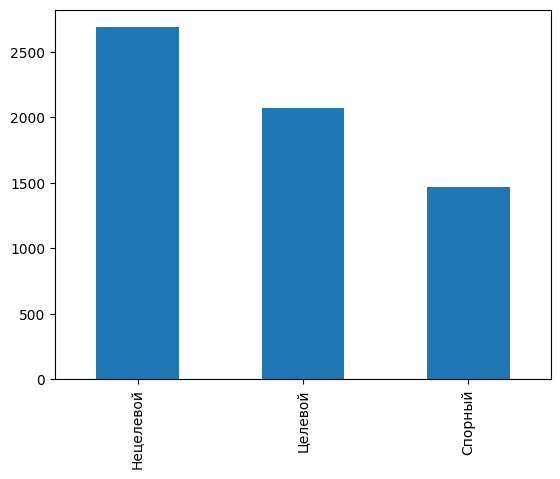

In [ ]:
# Визуализация баланса классов в обучающей выборке
train_df['Класс'].value_counts().plot.bar()

<Axes: >

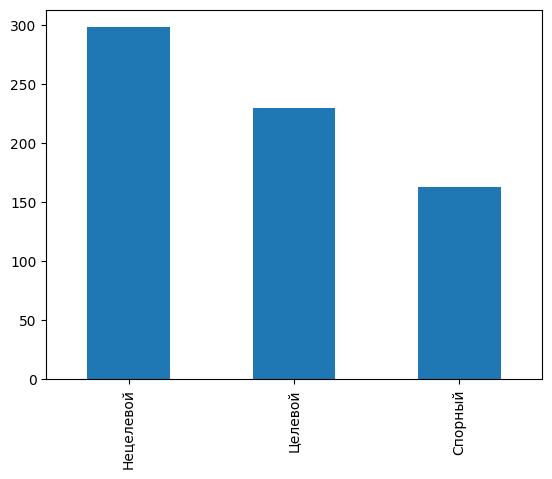

In [ ]:
# Визуализация баланса классов в тестовой выборке
test_df['Класс'].value_counts().plot.bar()

In [ ]:
# Анализ длительности целевых звонков в обучающей выборке
for length in range(30, 76, 5):
  print(f"Количество целевых звонков с длительностью меньше {length} сек: {train_df['Класс'][(train_df['Длительность звонка'] < length) & (train_df['Класс'] == 'Целевой')].count()} из {train_df['Класс'][train_df['Длительность звонка'] < length].count()}")

Количество целевых звонков с длительностью меньше 30 сек: 23 из 1559
Количество целевых звонков с длительностью меньше 35 сек: 37 из 1737
Количество целевых звонков с длительностью меньше 40 сек: 47 из 1887
Количество целевых звонков с длительностью меньше 45 сек: 65 из 2015
Количество целевых звонков с длительностью меньше 50 сек: 78 из 2149
Количество целевых звонков с длительностью меньше 55 сек: 92 из 2260
Количество целевых звонков с длительностью меньше 60 сек: 103 из 2399
Количество целевых звонков с длительностью меньше 65 сек: 115 из 2514
Количество целевых звонков с длительностью меньше 70 сек: 128 из 2644
Количество целевых звонков с длительностью меньше 75 сек: 142 из 2889


In [ ]:
# Анализ длительности целевых звонков в тестовой выборке
for length in range(30, 76, 5):
  print(f"Количество целевых звонков с длительностью меньше {length} сек: {test_df['Класс'][(test_df['Длительность звонка'] < length) & (test_df['Класс'] == 'Целевой')].count()} из {test_df['Класс'][test_df['Длительность звонка'] < length].count()}")

Количество целевых звонков с длительностью меньше 30 сек: 2 из 179
Количество целевых звонков с длительностью меньше 35 сек: 2 из 191
Количество целевых звонков с длительностью меньше 40 сек: 4 из 206
Количество целевых звонков с длительностью меньше 45 сек: 5 из 221
Количество целевых звонков с длительностью меньше 50 сек: 6 из 238
Количество целевых звонков с длительностью меньше 55 сек: 8 из 255
Количество целевых звонков с длительностью меньше 60 сек: 10 из 268
Количество целевых звонков с длительностью меньше 65 сек: 12 из 278
Количество целевых звонков с длительностью меньше 70 сек: 15 из 294
Количество целевых звонков с длительностью меньше 75 сек: 16 из 303


## [Маленький и быстрый BERT для русского языка](https://habr.com/ru/articles/562064/)

In [ ]:
# Загружаем токенайзер rubert-tiny
rubert_tiny_tokenizer = AutoTokenizer.from_pretrained('cointegrated/rubert-tiny')

# Загружаем модель rubert-tiny
rubert_tiny_model = AutoModel.from_pretrained('cointegrated/rubert-tiny')

# Если есть GPU
rubert_tiny_model.cuda()

tokenizer_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/632 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/241k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/468k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.7M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(29564, 312, padding_idx=0)
    (position_embeddings): Embedding(512, 312)
    (token_type_embeddings): Embedding(2, 312)
    (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-2): 3 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=312, out_features=312, bias=True)
            (key): Linear(in_features=312, out_features=312, bias=True)
            (value): Linear(in_features=312, out_features=312, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=312, out_features=312, bias=True)
            (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
    

In [ ]:
# Функция для получения 312-мерного CLS-эмбеддинга предложения
def embed_bert_cls(text, model, tokenizer):
  t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
  with torch.no_grad():
    model_output = model(**{k: v.to(model.device) for k, v in t.items()})
  embeddings = model_output.last_hidden_state[:, 0, :]
  embeddings = torch.nn.functional.normalize(embeddings)
  return embeddings[0].cpu().numpy()

In [ ]:
# Пример использования функции embed_bert_cls()
print(embed_bert_cls('привет мир', rubert_tiny_model, rubert_tiny_tokenizer).shape)

(312,)


## Подготовка текстовых данных

In [ ]:
# Предобработка текстов whisper-транскрибации записей звонков
train_df['Текст whisper-транскрибации записи звонка'] = train_df['Текст whisper-транскрибации записи звонка'].apply(lambda s: re.sub('[^А-Яа-я0-9 ]', '', s.lower()).strip())
train_df['Текст whisper-транскрибации записи звонка'] = np.where(train_df['Текст whisper-транскрибации записи звонка'].str.len() < 5, 'безответа', train_df['Текст whisper-транскрибации записи звонка'])
train_df['Текст whisper-транскрибации записи звонка'] = train_df['Текст whisper-транскрибации записи звонка'].str.replace('ё', 'е', regex=False)
test_df['Текст whisper-транскрибации записи звонка'] = test_df['Текст whisper-транскрибации записи звонка'].apply(lambda s: re.sub('[^А-Яа-я0-9 ]', '', s.lower()).strip())
test_df['Текст whisper-транскрибации записи звонка'] = np.where(test_df['Текст whisper-транскрибации записи звонка'].str.len() < 5, 'безответа', test_df['Текст whisper-транскрибации записи звонка'])
test_df['Текст whisper-транскрибации записи звонка'] = test_df['Текст whisper-транскрибации записи звонка'].str.replace('ё', 'е', regex=False)

In [ ]:
# Текстовые данные
x_textdata      = train_df['Текст whisper-транскрибации записи звонка'].tolist()
x_textdata_test = test_df['Текст whisper-транскрибации записи звонка'].tolist()
print('x_textdata:', len(x_textdata))
print(x_textdata[:2])
print()
print('x_textdata_test:', len(x_textdata_test))
print(x_textdata_test[:2])

x_textdata: 6233
['клубный город на веке примар', 'государственный город на реке примавера нин здравствуйте ой ошиблась']

x_textdata_test: 691
['здравствуйте я хотела уточнить по статусе квартир соединю с вами специалистом проконсультирую как вас представить по имени анна ранее обращались к нам анна нет спасибо минуту обращаем ваше внимание что в целях контроля качества услуг разговор может быть записан обращаем ваше внимание что в целях контроля качества услуг разговор может быть записан обращаем ваше внимание что в целях контроля качества услуг разговор может быть записан глубинный город на реке примаверна я зову антон анна добрый день чем могу быть полезен добрый день я хотела уточнить по поводу стоимости квартир я несусь в это однокомнатное гдето 40 метров угу такие варианты есть преимущественно сейчас варианты остались во второй очереди у нас строятся сейчас две очереди это район покровскойстрешнего комплекс строится на первой береговой линии строятся прекрасные видовые характери

In [ ]:
# Объём словаря для токенайзера
VOCAB_SIZE = 35000

# Токенайзер
tokenizer = Tokenizer(num_words=VOCAB_SIZE,
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                      lower=True,
                      split=' ',
                      oov_token='неизвестное_слово',
                      char_level=False)

# Получаем словарь частотности
tokenizer.fit_on_texts(x_textdata)

In [ ]:
# Сохраняем tokenizer в pkl
with open(preprocessed_data_path + 'tokenizer.pkl', 'wb') as f:
  pkl.dump(tokenizer, f)

In [ ]:
# Последовательности индексов согласно словарю частотности
x_textdata_seq      = tokenizer.texts_to_sequences(x_textdata)
x_textdata_seq_test = tokenizer.texts_to_sequences(x_textdata_test)
print('x_textdata_seq:', len(x_textdata_seq))
print(x_textdata_seq[:2])
print()
print('x_textdata_seq_test:', len(x_textdata_seq_test))
print(x_textdata_seq_test[:2])

x_textdata_seq: 6233
[[135, 96, 5, 10458, 27621], [6634, 96, 5, 94, 116, 9590, 32, 750, 4786]]

x_textdata_seq_test: 691
[[32, 4, 239, 456, 17, 11593, 148, 345, 15, 64, 1532, 4166, 24, 14, 473, 17, 1826, 596, 1172, 2783, 50, 115, 596, 31, 40, 216, 178, 137, 144, 11, 2, 175, 390, 177, 381, 154, 58, 56, 354, 178, 137, 144, 11, 2, 175, 390, 177, 381, 154, 58, 56, 354, 178, 137, 144, 11, 2, 175, 390, 177, 381, 154, 58, 56, 354, 3320, 96, 5, 94, 28521, 4, 9054, 494, 596, 59, 55, 126, 49, 56, 670, 59, 55, 4, 239, 456, 17, 221, 186, 148, 4, 1, 2, 9, 8167, 163, 356, 60, 86, 211, 77, 8, 3725, 27, 77, 649, 174, 112, 102, 7, 22, 1497, 27, 155, 102, 9, 326, 1, 84, 475, 5, 283, 844, 160, 1497, 4489, 576, 749, 5, 6642, 687, 397, 6, 624, 664, 475, 410, 545, 2432, 992, 855, 20, 8, 3920, 6864, 15, 951, 2, 1028, 12, 26, 259, 1684, 6, 93, 52, 57, 551, 1615, 3051, 340, 5, 2153, 687, 52, 38, 27, 213, 77, 613, 37, 979, 125, 60, 17, 186, 77, 883, 37, 560, 67, 1211, 304, 229, 421, 214, 2332, 2, 484, 37, 663, 

In [ ]:
# Bag of Words
x_textdata_01      = tokenizer.texts_to_matrix(x_textdata)
x_textdata_01_test = tokenizer.texts_to_matrix(x_textdata_test)
print('x_textdata_01.shape:', x_textdata_01.shape)
print(x_textdata_01[:2])
print()
print('x_textdata_01_test.shape:', x_textdata_01_test.shape)
print(x_textdata_01_test[:2])

x_textdata_01.shape: (6233, 35000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

x_textdata_01_test.shape: (691, 35000)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
# CLS-эмбеддинги
x_textdata_embed_bert_cls      = []
x_textdata_embed_bert_cls_test = []
for text in x_textdata:
  x_textdata_embed_bert_cls.append(embed_bert_cls(text, rubert_tiny_model, rubert_tiny_tokenizer))
for text in x_textdata_test:
  x_textdata_embed_bert_cls_test.append(embed_bert_cls(text, rubert_tiny_model, rubert_tiny_tokenizer))
x_textdata_embed_bert_cls      = np.array(x_textdata_embed_bert_cls)
x_textdata_embed_bert_cls_test = np.array(x_textdata_embed_bert_cls_test)
print('x_textdata_embed_bert_cls:', x_textdata_embed_bert_cls.shape)
print(x_textdata_embed_bert_cls[:2])
print()
print('x_textdata_embed_bert_cls_test:', x_textdata_embed_bert_cls_test.shape)
print(x_textdata_embed_bert_cls_test[:2])

x_textdata_embed_bert_cls: (6233, 312)
[[ 2.47226451e-02 -3.23208123e-02  4.38047722e-02 -4.54334542e-02
   6.82020420e-03  3.06399893e-02  7.02533126e-02  1.18417433e-02
  -4.45170924e-02 -5.99192344e-02  1.01179384e-01 -3.09999213e-02
  -1.03723782e-03 -3.00240945e-02  2.64532282e-03  2.92564114e-03
   3.09987646e-02  2.34427787e-02 -1.88566968e-02  9.27964002e-02
  -1.31302010e-02 -1.81785822e-02 -2.85516661e-02  2.21250404e-04
   7.31438026e-02  4.64340858e-02  7.65030533e-02  7.21635893e-02
   3.40017080e-02  6.18375018e-02 -6.63869828e-02 -5.42880930e-02
   5.97855262e-02  4.64415476e-02 -6.65530786e-02  5.53039014e-02
   3.93262953e-02  2.07769703e-02 -1.43911704e-01 -3.76143940e-02
  -5.76049648e-02  8.85214955e-02  1.94464829e-02 -4.90402505e-02
  -3.12700979e-02  2.23601684e-02  6.08519651e-02 -6.43504336e-02
   1.02469958e-01 -5.54593932e-03  3.43496725e-02 -1.06555432e-01
   6.18061721e-02 -7.06472714e-03 -2.02339411e-01  9.20511130e-03
   7.98265859e-02  8.33783597e-02  4.

## Выборки

In [ ]:
# Классы
train_df['Класс'] = train_df['Класс'].apply(lambda x: 1 if x == 'Целевой' else 0)
test_df['Класс']  = test_df['Класс'].apply(lambda x: 1 if x == 'Целевой' else 0)
y_data = train_df['Класс'].values
y_test = test_df['Класс'].values
print('y_data.shape:', y_data.shape)
print(y_data[:20])
print()
print('y_test.shape:', y_test.shape)
print(y_test[:20])

y_data.shape: (6233,)
[0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0]

y_test.shape: (691,)
[1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1]


In [ ]:
# Разделение на обучающую и проверочную выборки
x_textdata_train,                x_textdata_val,                \
x_textdata_seq_train,            x_textdata_seq_val,            \
x_textdata_01_train,             x_textdata_01_val,             \
x_textdata_embed_bert_cls_train, x_textdata_embed_bert_cls_val, \
y_train,                         y_val =                        \
train_test_split(x_textdata,
                 x_textdata_seq,
                 x_textdata_01,
                 x_textdata_embed_bert_cls,
                 y_data,
                 test_size=0.2,
                 random_state=42,
                 stratify=y_data)

In [ ]:
print('               x_textdata: ', len(x_textdata))
print('           x_textdata_seq: ', len(x_textdata_seq))
print('            x_textdata_01:',  x_textdata_01.shape)
print('x_textdata_embed_bert_cls:',  x_textdata_embed_bert_cls.shape)
print('                   y_data:',  y_data.shape)

               x_textdata:  6233
           x_textdata_seq:  6233
            x_textdata_01: (6233, 35000)
x_textdata_embed_bert_cls: (6233, 312)
                   y_data: (6233,)


In [ ]:
print('               x_textdata_train: ', len(x_textdata_train))
print('           x_textdata_seq_train: ', len(x_textdata_seq_train))
print('            x_textdata_01_train:',  x_textdata_01_train.shape)
print('x_textdata_embed_bert_cls_train:',  x_textdata_embed_bert_cls_train.shape)
print('                        y_train:',  y_train.shape)

               x_textdata_train:  4986
           x_textdata_seq_train:  4986
            x_textdata_01_train: (4986, 35000)
x_textdata_embed_bert_cls_train: (4986, 312)
                        y_train: (4986,)


In [ ]:
print('               x_textdata_val: ', len(x_textdata_val))
print('           x_textdata_seq_val: ', len(x_textdata_seq_val))
print('            x_textdata_01_val:',  x_textdata_01_val.shape)
print('x_textdata_embed_bert_cls_val:',  x_textdata_embed_bert_cls_val.shape)
print('                        y_val:',  y_val.shape)

               x_textdata_val:  1247
           x_textdata_seq_val:  1247
            x_textdata_01_val: (1247, 35000)
x_textdata_embed_bert_cls_val: (1247, 312)
                        y_val: (1247,)


In [ ]:
print('               x_textdata_test: ', len(x_textdata_test))
print('           x_textdata_seq_test: ', len(x_textdata_seq_test))
print('            x_textdata_01_test:',  x_textdata_01_test.shape)
print('x_textdata_embed_bert_cls_test:',  x_textdata_embed_bert_cls_test.shape)
print('                        y_test:',  y_test.shape)

               x_textdata_test:  691
           x_textdata_seq_test:  691
            x_textdata_01_test: (691, 35000)
x_textdata_embed_bert_cls_test: (691, 312)
                        y_test: (691,)


In [ ]:
# Сохраняем x_textdata в pkl
with open(preprocessed_data_path + 'x_textdata.pkl', 'wb') as f:
  pkl.dump(x_textdata, f)

# Сохраняем x_textdata_train в pkl
with open(preprocessed_data_path + 'x_textdata_train.pkl', 'wb') as f:
  pkl.dump(x_textdata_train, f)

# Сохраняем x_textdata_val в pkl
with open(preprocessed_data_path + 'x_textdata_val.pkl', 'wb') as f:
  pkl.dump(x_textdata_val, f)

# Сохраняем x_textdata_test в pkl
with open(preprocessed_data_path + 'x_textdata_test.pkl', 'wb') as f:
  pkl.dump(x_textdata_test, f)

In [ ]:
# Сохраняем x_textdata_seq в pkl
with open(preprocessed_data_path + 'x_textdata_seq.pkl', 'wb') as f:
  pkl.dump(x_textdata_seq, f)

# Сохраняем x_textdata_seq_train в pkl
with open(preprocessed_data_path + 'x_textdata_seq_train.pkl', 'wb') as f:
  pkl.dump(x_textdata_seq_train, f)

# Сохраняем x_textdata_seq_val в pkl
with open(preprocessed_data_path + 'x_textdata_seq_val.pkl', 'wb') as f:
  pkl.dump(x_textdata_seq_val, f)

# Сохраняем x_textdata_seq_test в pkl
with open(preprocessed_data_path + 'x_textdata_seq_test.pkl', 'wb') as f:
  pkl.dump(x_textdata_seq_test, f)

In [ ]:
# Сохраняем x_textdata_01 в pkl
with open(preprocessed_data_path + 'x_textdata_01.pkl', 'wb') as f:
  pkl.dump(x_textdata_01, f)

# Сохраняем x_textdata_01_train в pkl
with open(preprocessed_data_path + 'x_textdata_01_train.pkl', 'wb') as f:
  pkl.dump(x_textdata_01_train, f)

# Сохраняем x_textdata_01_val в pkl
with open(preprocessed_data_path + 'x_textdata_01_val.pkl', 'wb') as f:
  pkl.dump(x_textdata_01_val, f)

# Сохраняем x_textdata_01_test в pkl
with open(preprocessed_data_path + 'x_textdata_01_test.pkl', 'wb') as f:
  pkl.dump(x_textdata_01_test, f)

In [ ]:
# Сохраняем x_textdata_embed_bert_cls в pkl
with open(preprocessed_data_path + 'x_textdata_embed_bert_cls.pkl', 'wb') as f:
  pkl.dump(x_textdata_embed_bert_cls, f)

# Сохраняем x_textdata_embed_bert_cls_train в pkl
with open(preprocessed_data_path + 'x_textdata_embed_bert_cls_train.pkl', 'wb') as f:
  pkl.dump(x_textdata_embed_bert_cls_train, f)

# Сохраняем x_textdata_embed_bert_cls_val в pkl
with open(preprocessed_data_path + 'x_textdata_embed_bert_cls_val.pkl', 'wb') as f:
  pkl.dump(x_textdata_embed_bert_cls_val, f)

# Сохраняем x_textdata_embed_bert_cls_test в pkl
with open(preprocessed_data_path + 'x_textdata_embed_bert_cls_test.pkl', 'wb') as f:
  pkl.dump(x_textdata_embed_bert_cls_test, f)

In [ ]:
# Сохраняем y_data в pkl
with open(preprocessed_data_path + 'y_data.pkl', 'wb') as f:
  pkl.dump(y_data, f)

# Сохраняем y_train в pkl
with open(preprocessed_data_path + 'y_train.pkl', 'wb') as f:
  pkl.dump(y_train, f)

# Сохраняем y_val в pkl
with open(preprocessed_data_path + 'y_val.pkl', 'wb') as f:
  pkl.dump(y_val, f)

# Сохраняем y_test в pkl
with open(preprocessed_data_path + 'y_test.pkl', 'wb') as f:
  pkl.dump(y_test, f)

In [ ]:
# Вычисление весовых коэффициентов классов
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights

array([0.74932372, 1.50271248])

In [ ]:
# Сохраняем class_weights в pkl
with open(preprocessed_data_path + 'class_weights.pkl', 'wb') as f:
  pkl.dump(class_weights, f)

## Нейронная сеть на текстовых данных

In [ ]:
# Загрузка данных
with open(preprocessed_data_path + 'x_textdata_01_train.pkl', 'rb') as f:
  x_textdata_01_train = pkl.load(f)

with open(preprocessed_data_path + 'x_textdata_01_val.pkl', 'rb') as f:
  x_textdata_01_val = pkl.load(f)

with open(preprocessed_data_path + 'x_textdata_01_test.pkl', 'rb') as f:
  x_textdata_01_test = pkl.load(f)

with open(preprocessed_data_path + 'x_textdata_embed_bert_cls_train.pkl', 'rb') as f:
  x_textdata_embed_bert_cls_train = pkl.load(f)

with open(preprocessed_data_path + 'x_textdata_embed_bert_cls_val.pkl', 'rb') as f:
  x_textdata_embed_bert_cls_val = pkl.load(f)

with open(preprocessed_data_path + 'x_textdata_embed_bert_cls_test.pkl', 'rb') as f:
  x_textdata_embed_bert_cls_test = pkl.load(f)

with open(preprocessed_data_path + 'y_train.pkl', 'rb') as f:
  y_train = pkl.load(f)

with open(preprocessed_data_path + 'y_val.pkl', 'rb') as f:
  y_val = pkl.load(f)

with open(preprocessed_data_path + 'y_test.pkl', 'rb') as f:
  y_test = pkl.load(f)

with open(preprocessed_data_path + 'class_weights.pkl', 'rb') as f:
  class_weights = pkl.load(f)

In [ ]:
# Функция для отрисовки графика процесса обучения нейронной сети
def plot_history(history, loss, metric):
  fig, ax = plt.subplots(1, 2, figsize=(15, 5))
  parameters = [loss, metric]
  labels = ['Ошибка', 'Доля верных ответов']
  for i in range(2):
    ax[i].plot(history.history[parameters[i]],          label=labels[i] + ' на обучающей выборке')
    ax[i].plot(history.history['val_' + parameters[i]], label=labels[i] + ' на проверочной выборке')
    ax[i].set_title(labels[i])
    ax[i].legend()
  plt.show()

In [ ]:
# Функция для создания модели нейронной сети
def create_model(input_shape):
  input  = Input(shape=(input_shape),
                 name='input')
  x      = Dense(128, activation='relu') (input)
  x      = Dense(128, activation='relu')     (x)
  x      = Dense(64,  activation='relu')     (x)
  x      = Dense(32,  activation='relu')     (x)
  x      = BatchNormalization()              (x)
  x      = Dense(16,  activation='relu')     (x)
  x      = Dropout(0.4)                      (x)
  output = Dense(1,    activation='sigmoid',
                 name='output')              (x)
  return Model([input], output)

### Метрика `AUC`

#### Bag of Words

In [ ]:
# Создание модели нейронной сети
model = create_model(x_textdata_01_train.shape[1])

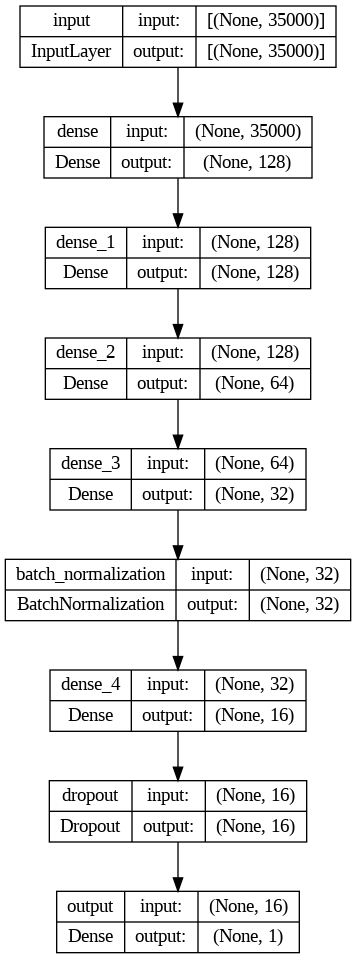

In [ ]:
# Архитектура нейронной сети
plot_model(model, show_shapes=True)

In [ ]:
# Коллбэки
save_best_callback = ModelCheckpoint(filepath='./',
                                     monitor='val_auc',
                                     verbose=1,
                                     mode='max',
                                     save_weights_only=True,
                                     save_best_only=True)
early_stop_callback =  EarlyStopping(monitor='val_auc',
                                     patience=20)

In [ ]:
# Компиляция модели нейронной сети
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['AUC'])

In [ ]:
# Обучение модели нейронной сети
history = model.fit(x_textdata_01_train, y_train,
                    validation_data=(x_textdata_01_val, y_val),
                    batch_size=64,
                    epochs=30,
                    verbose=1,
                    shuffle=True,
                    class_weight={0:class_weights[0], 1:class_weights[1]},
                    callbacks=[save_best_callback, early_stop_callback])

Epoch 1/30
75/78 [===========================>..] - ETA: 0s - loss: 0.4977 - auc: 0.8639
Epoch 1: val_auc improved from -inf to 0.94063, saving model to ./
78/78 [==============================] - 11s 25ms/step - loss: 0.4940 - auc: 0.8669 - val_loss: 0.6489 - val_auc: 0.9406
Epoch 2/30
78/78 [==============================] - ETA: 0s - loss: 0.3499 - auc: 0.9447
Epoch 2: val_auc improved from 0.94063 to 0.94818, saving model to ./
78/78 [==============================] - 1s 15ms/step - loss: 0.3499 - auc: 0.9447 - val_loss: 0.5726 - val_auc: 0.9482
Epoch 3/30
77/78 [============================>.] - ETA: 0s - loss: 0.2725 - auc: 0.9672
Epoch 3: val_auc improved from 0.94818 to 0.95376, saving model to ./
78/78 [==============================] - 1s 15ms/step - loss: 0.2724 - auc: 0.9671 - val_loss: 0.4906 - val_auc: 0.9538
Epoch 4/30
76/78 [============================>.] - ETA: 0s - loss: 0.2102 - auc: 0.9822
Epoch 4: val_auc improved from 0.95376 to 0.95459, saving model to ./
78/78 

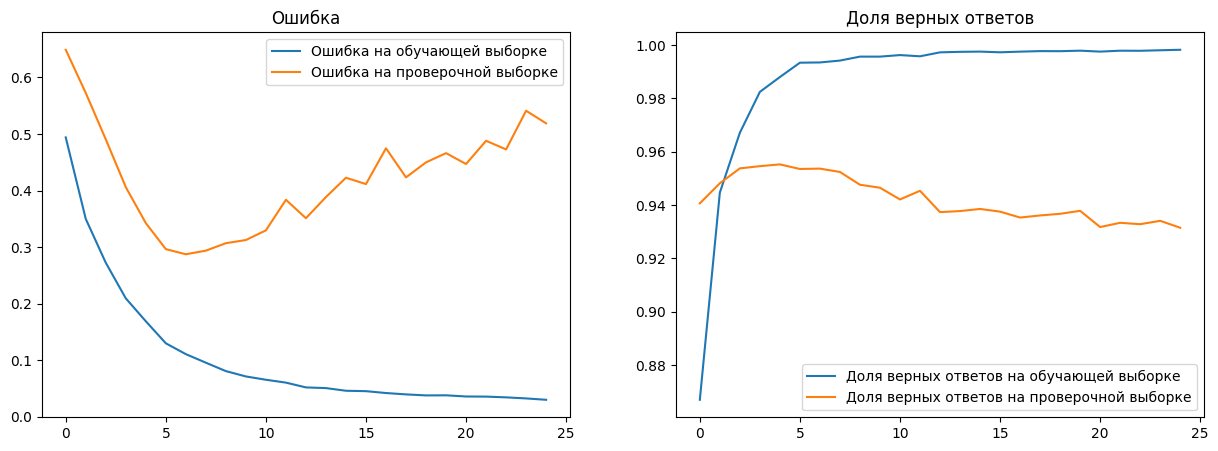

In [ ]:
# График процесса обучения
plot_history(history, 'loss', 'auc')

In [ ]:
# Загрузка лучших весов
model.load_weights('./')

In [ ]:
# Сохранение модели
model.save(model_path + 'model_BoW_auc.keras')

##### Проверка работы модели на обучающей выборке

In [ ]:
# Оценка по метрике ROC-AUC
y_predict = model.predict(x_textdata_01_train)
roc_auc = roc_auc_score(y_train, y_predict)
print(f'Точность на обучающей выборке по метрике ROC-AUC: {roc_auc:5.3f}')

156/156 [==============================] - 1s 3ms/step
Точность на обучающей выборке по метрике ROC-AUC: 0.994


In [ ]:
# Отчёт классификации
threshold = 0.5
print(classification_report(y_train, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3327
           1       0.98      0.97      0.98      1659

    accuracy                           0.98      4986
   macro avg       0.98      0.98      0.98      4986
weighted avg       0.98      0.98      0.98      4986



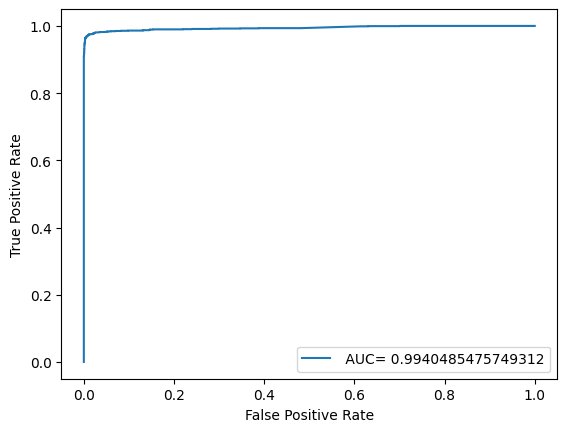

In [ ]:
# ROC-кривая
fpr, tpr, _ = roc_curve(y_train, y_predict)
plt.plot(fpr, tpr, label=' AUC= ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

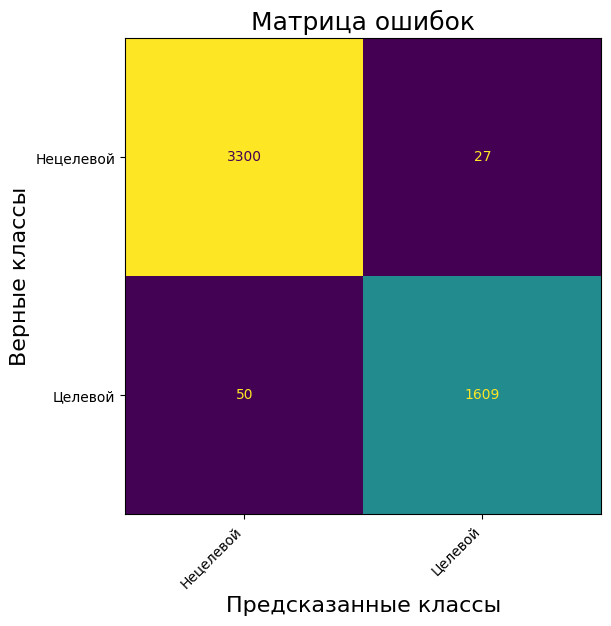

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_train, (y_predict > threshold).astype(int))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на проверочной выборке

In [ ]:
# Оценка по метрике ROC-AUC
y_predict = model.predict(x_textdata_01_val)
roc_auc = roc_auc_score(y_val, y_predict)
print(f'Точность на проверочной выборке по метрике ROC-AUC: {roc_auc:5.3f}')

39/39 [==============================] - 0s 5ms/step
Точность на проверочной выборке по метрике ROC-AUC: 0.955


In [ ]:
# Отчёт классификации
threshold = 0.5
print(classification_report(y_val, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       832
           1       0.81      0.89      0.85       415

    accuracy                           0.89      1247
   macro avg       0.88      0.89      0.88      1247
weighted avg       0.90      0.89      0.90      1247



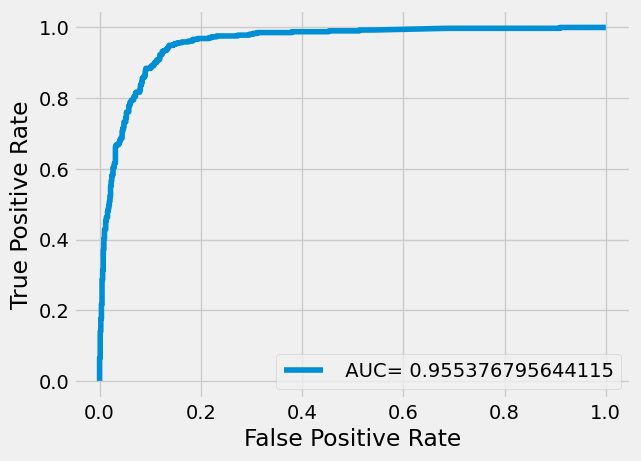

In [ ]:
# ROC-кривая
fpr, tpr, _ = roc_curve(y_val, y_predict)
plt.plot(fpr, tpr, label=' AUC= ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

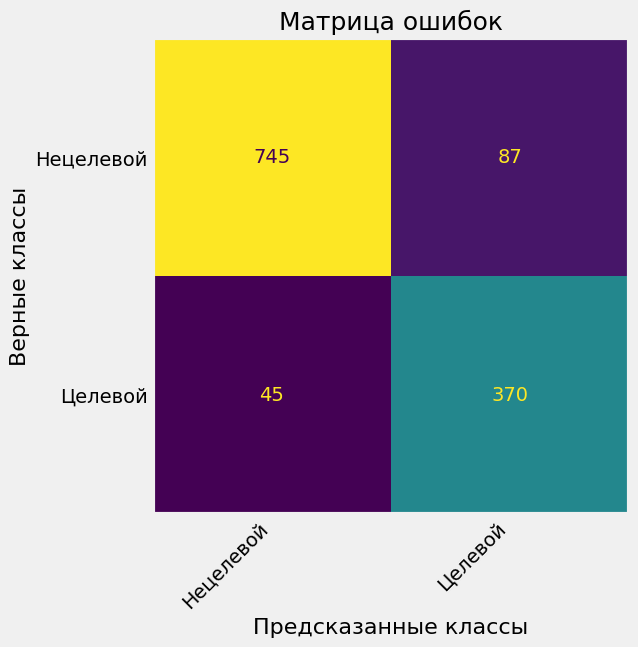

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_val, (y_predict > threshold).astype(int))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на тестовой выборке

In [ ]:
# Оценка по метрике ROC-AUC
y_predict = model.predict(x_textdata_01_test)
roc_auc = roc_auc_score(y_test, y_predict)
print(f'Точность на тестовой выборке по метрике ROC-AUC: {roc_auc:5.3f}')

22/22 [==============================] - 0s 8ms/step
Точность на тестовой выборке по метрике ROC-AUC: 0.945


In [ ]:
# Отчёт классификации
threshold = 0.5
print(classification_report(y_test, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       461
           1       0.80      0.86      0.83       230

    accuracy                           0.88       691
   macro avg       0.87      0.88      0.87       691
weighted avg       0.89      0.88      0.88       691



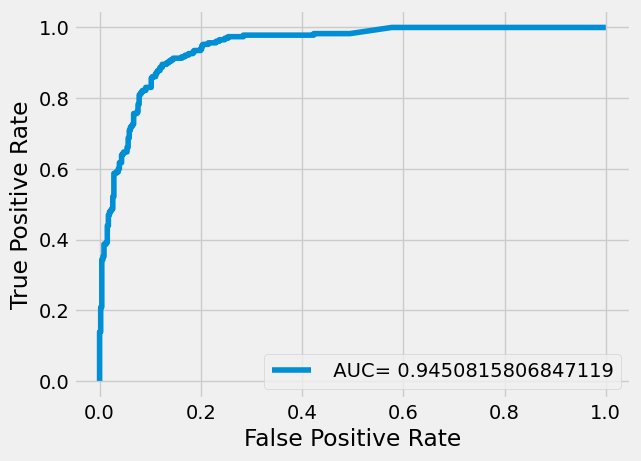

In [ ]:
# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, label=' AUC= ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

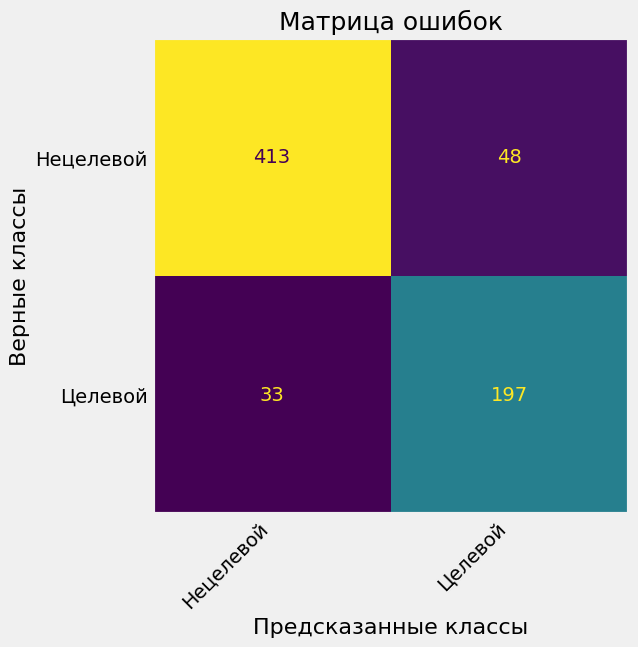

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, (y_predict > threshold).astype(int))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

#### CLS-эмбеддинги

In [ ]:
# Создание модели нейронной сети
model = create_model(x_textdata_embed_bert_cls_train.shape[1])

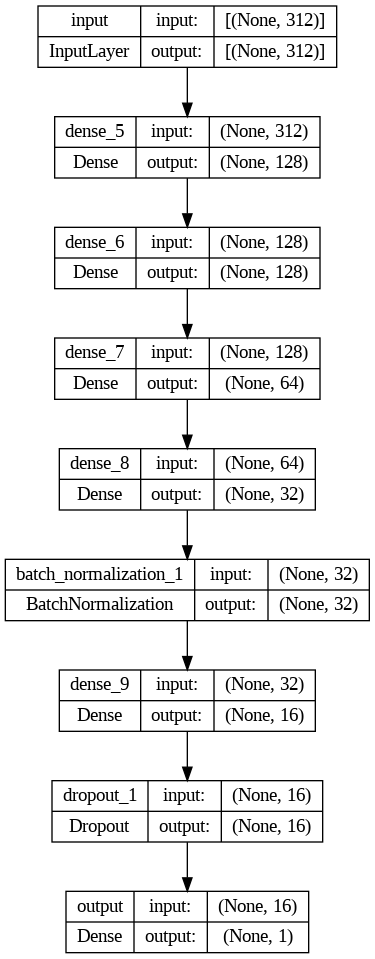

In [ ]:
# Архитектура нейронной сети
plot_model(model, show_shapes=True)

In [ ]:
# Коллбэки
save_best_callback = ModelCheckpoint(filepath='./',
                                     monitor='val_auc',
                                     verbose=1,
                                     mode='max',
                                     save_weights_only=True,
                                     save_best_only=True)
early_stop_callback =  EarlyStopping(monitor='val_auc',
                                     patience=20)

In [ ]:
# Компиляция модели нейронной сети
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['AUC'])

In [ ]:
# Обучение модели нейронной сети
history = model.fit(x_textdata_embed_bert_cls_train, y_train,
                    validation_data=(x_textdata_embed_bert_cls_val, y_val),
                    batch_size=64,
                    epochs=30,
                    verbose=1,
                    shuffle=True,
                    class_weight={0:class_weights[0], 1:class_weights[1]},
                    callbacks=[save_best_callback, early_stop_callback])

Epoch 1/30
73/78 [===========================>..] - ETA: 0s - loss: 0.5193 - auc: 0.8456
Epoch 1: val_auc improved from -inf to 0.89795, saving model to ./
78/78 [==============================] - 4s 10ms/step - loss: 0.5145 - auc: 0.8485 - val_loss: 0.6725 - val_auc: 0.8979
Epoch 2/30
74/78 [===========================>..] - ETA: 0s - loss: 0.4111 - auc: 0.9040
Epoch 2: val_auc improved from 0.89795 to 0.92186, saving model to ./
78/78 [==============================] - 1s 7ms/step - loss: 0.4110 - auc: 0.9041 - val_loss: 0.6292 - val_auc: 0.9219
Epoch 3/30
76/78 [============================>.] - ETA: 0s - loss: 0.3696 - auc: 0.9206
Epoch 3: val_auc improved from 0.92186 to 0.93476, saving model to ./
78/78 [==============================] - 1s 7ms/step - loss: 0.3706 - auc: 0.9200 - val_loss: 0.5786 - val_auc: 0.9348
Epoch 4/30
74/78 [===========================>..] - ETA: 0s - loss: 0.3575 - auc: 0.9235
Epoch 4: val_auc improved from 0.93476 to 0.93712, saving model to ./
78/78 [==

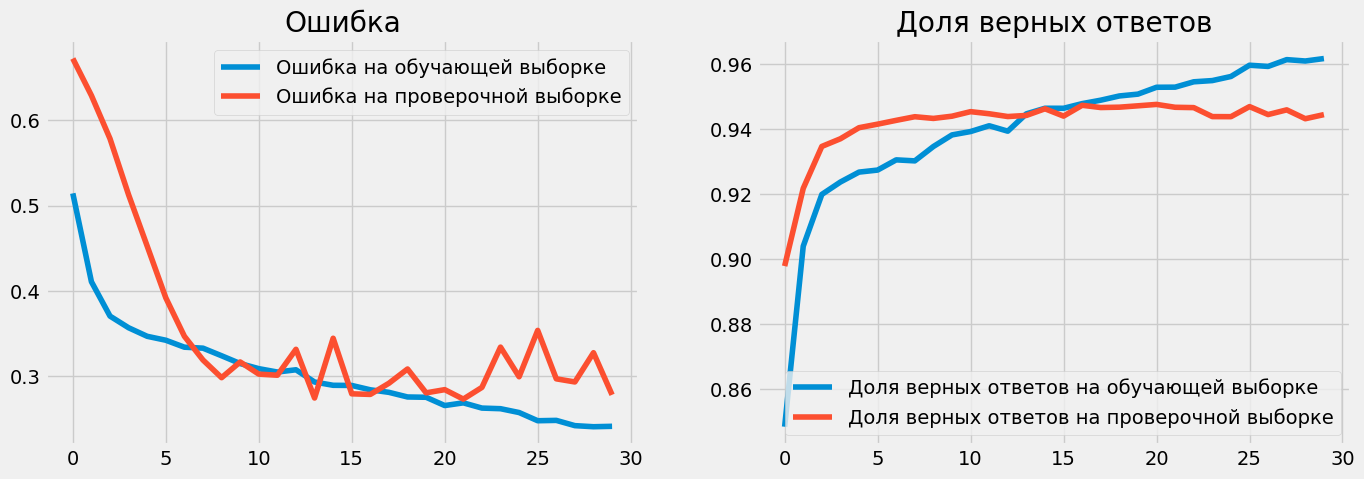

In [ ]:
# График процесса обучения
plot_history(history, 'loss', 'auc')

In [ ]:
# Загрузка лучших весов
model.load_weights('./')

In [ ]:
# Сохранение модели
model.save(model_path + 'model_embed_bert_cls_auc.keras')

##### Проверка работы модели на обучающей выборке

In [ ]:
# Оценка по метрике ROC-AUC
y_predict = model.predict(x_textdata_embed_bert_cls_train)
roc_auc = roc_auc_score(y_train, y_predict)
print(f'Точность на обучающей выборке по метрике ROC-AUC: {roc_auc:5.3f}')

156/156 [==============================] - 1s 2ms/step
Точность на обучающей выборке по метрике ROC-AUC: 0.964


In [ ]:
# Отчёт классификации
threshold = 0.5
print(classification_report(y_train, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3327
           1       0.79      0.95      0.86      1659

    accuracy                           0.90      4986
   macro avg       0.88      0.91      0.89      4986
weighted avg       0.91      0.90      0.90      4986



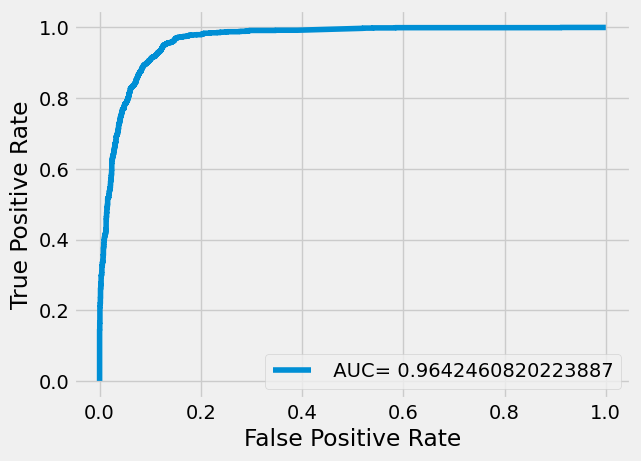

In [ ]:
# ROC-кривая
fpr, tpr, _ = roc_curve(y_train, y_predict)
plt.plot(fpr, tpr, label=' AUC= ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

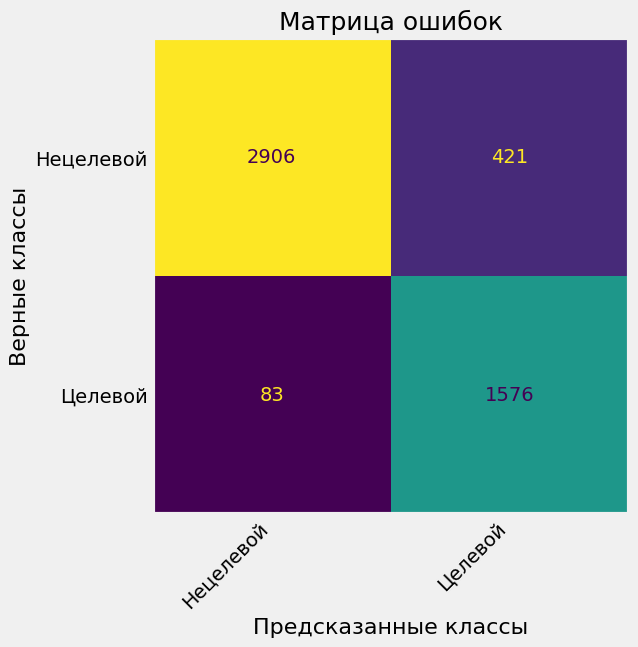

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_train, (y_predict > threshold).astype(int))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на проверочной выборке

In [ ]:
# Оценка по метрике ROC-AUC
y_predict = model.predict(x_textdata_embed_bert_cls_val)
roc_auc = roc_auc_score(y_val, y_predict)
print(f'Точность на проверочной выборке по метрике ROC-AUC: {roc_auc:5.3f}')

39/39 [==============================] - 0s 2ms/step
Точность на проверочной выборке по метрике ROC-AUC: 0.948


In [ ]:
# Отчёт классификации
threshold = 0.5
print(classification_report(y_val, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       832
           1       0.77      0.93      0.84       415

    accuracy                           0.88      1247
   macro avg       0.87      0.90      0.88      1247
weighted avg       0.90      0.88      0.89      1247



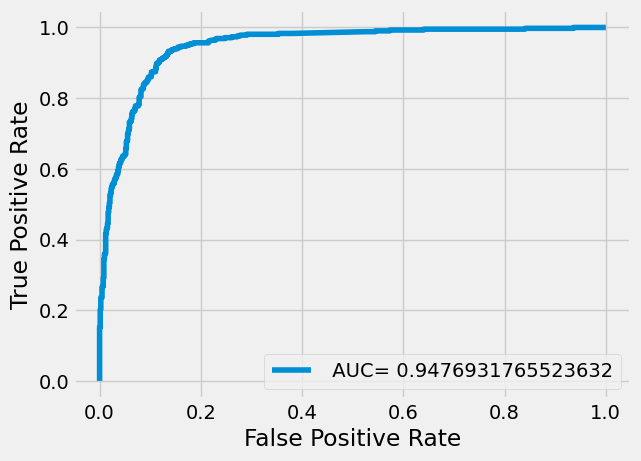

In [ ]:
# ROC-кривая
fpr, tpr, _ = roc_curve(y_val, y_predict)
plt.plot(fpr, tpr, label=' AUC= ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

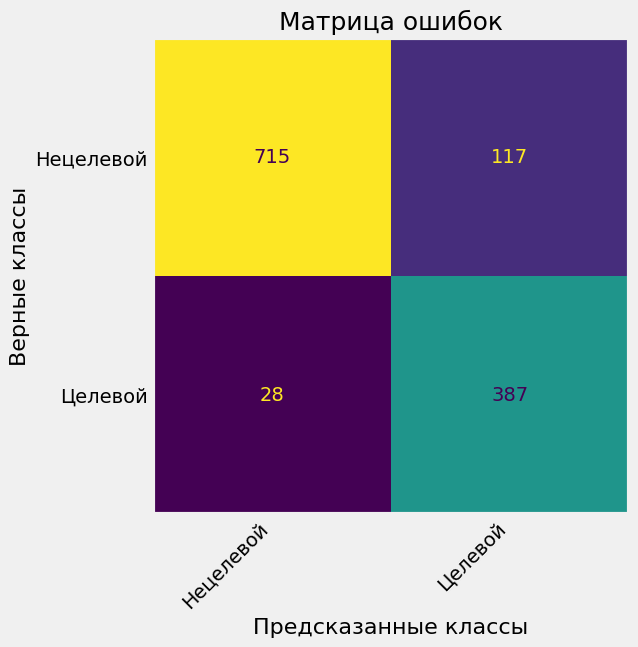

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_val, (y_predict > threshold).astype(int))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на тестовой выборке

In [ ]:
# Оценка по метрике ROC-AUC
y_predict = model.predict(x_textdata_embed_bert_cls_test)
roc_auc = roc_auc_score(y_test, y_predict)
print(f'Точность на тестовой выборке по метрике ROC-AUC: {roc_auc:5.3f}')

22/22 [==============================] - 0s 2ms/step
Точность на тестовой выборке по метрике ROC-AUC: 0.945


In [ ]:
# Отчёт классификации
threshold = 0.5
print(classification_report(y_test, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.95      0.86      0.91       461
           1       0.77      0.92      0.84       230

    accuracy                           0.88       691
   macro avg       0.86      0.89      0.87       691
weighted avg       0.89      0.88      0.88       691



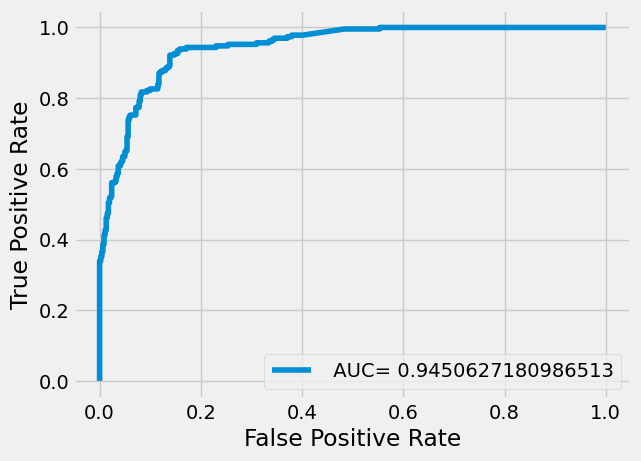

In [ ]:
# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, label=' AUC= ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

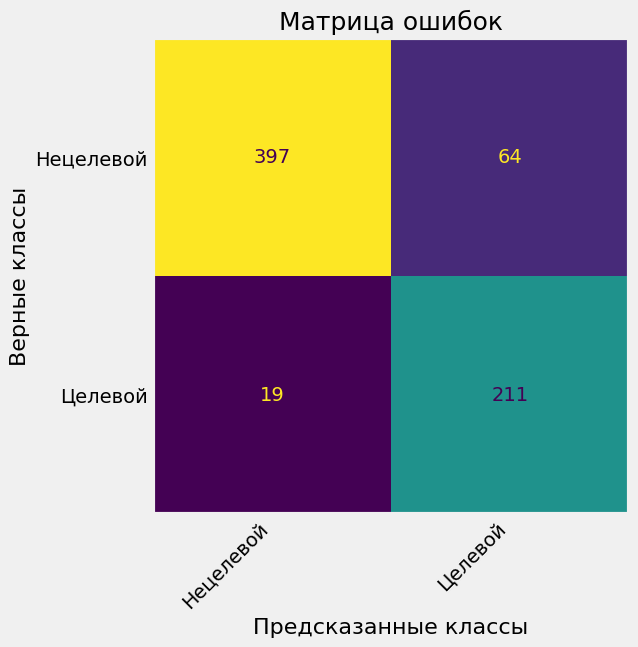

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, (y_predict > threshold).astype(int))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

### Метрика `accuracy`

#### Bag of Words

In [ ]:
# Создание модели нейронной сети
model = create_model(x_textdata_01_train.shape[1])

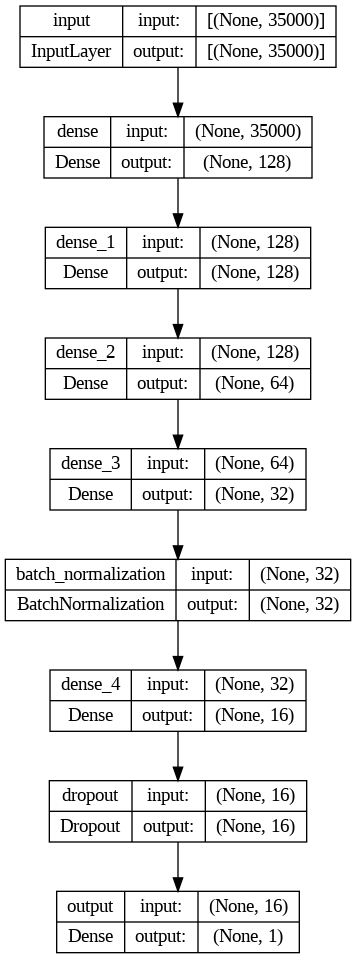

In [ ]:
# Архитектура нейронной сети
plot_model(model, show_shapes=True)

In [ ]:
# Коллбэки
save_best_callback = ModelCheckpoint(filepath='./',
                                     monitor='val_accuracy',
                                     verbose=1,
                                     mode='max',
                                     save_weights_only=True,
                                     save_best_only=True)
early_stop_callback =  EarlyStopping(monitor='val_accuracy',
                                     patience=20)

In [ ]:
# Компиляция модели нейронной сети
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Обучение модели нейронной сети
history = model.fit(x_textdata_01_train, y_train,
                    validation_data=(x_textdata_01_val, y_val),
                    batch_size=64,
                    epochs=30,
                    verbose=1,
                    shuffle=True,
                    class_weight={0:class_weights[0], 1:class_weights[1]},
                    callbacks=[save_best_callback, early_stop_callback])

Epoch 1/30
78/78 [==============================] - ETA: 0s - loss: 0.4806 - accuracy: 0.8024
Epoch 1: val_accuracy improved from -inf to 0.80273, saving model to ./
78/78 [==============================] - 11s 115ms/step - loss: 0.4806 - accuracy: 0.8024 - val_loss: 0.6311 - val_accuracy: 0.8027
Epoch 2/30
78/78 [==============================] - ETA: 0s - loss: 0.3437 - accuracy: 0.8779
Epoch 2: val_accuracy improved from 0.80273 to 0.88853, saving model to ./
78/78 [==============================] - 6s 78ms/step - loss: 0.3437 - accuracy: 0.8779 - val_loss: 0.5649 - val_accuracy: 0.8885
Epoch 3/30
78/78 [==============================] - ETA: 0s - loss: 0.2687 - accuracy: 0.9172
Epoch 3: val_accuracy improved from 0.88853 to 0.89254, saving model to ./
78/78 [==============================] - 8s 106ms/step - loss: 0.2687 - accuracy: 0.9172 - val_loss: 0.4838 - val_accuracy: 0.8925
Epoch 4/30
78/78 [==============================] - ETA: 0s - loss: 0.2103 - accuracy: 0.9416
Epoch 4: 

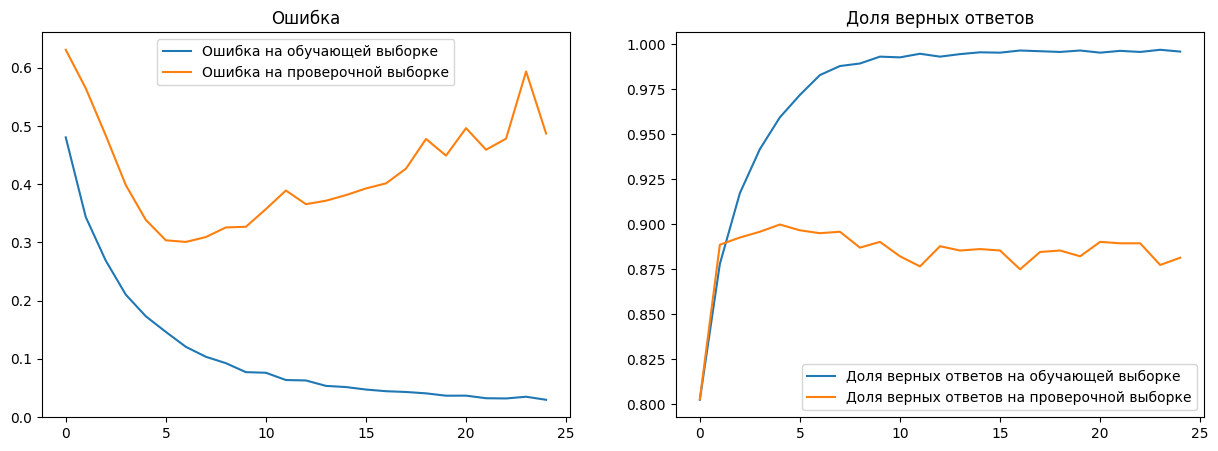

In [ ]:
# График процесса обучения
plot_history(history, 'loss', 'accuracy')

In [ ]:
# Загрузка лучших весов
model.load_weights('./')

In [ ]:
# Сохранение модели
model.save(model_path + 'model_BoW_acc.keras')

##### Проверка работы модели на обучающей выборке

In [ ]:
# Оценка по метрике accuracy
y_predict = model.predict(x_textdata_01_train)
accuracy = accuracy_score(y_train, np.rint(y_predict))
print(f'Точность на обучающей выборке по метрике accuracy: {accuracy:5.3f}')

156/156 [==============================] - 3s 20ms/step
Точность на обучающей выборке по метрике accuracy: 0.984


In [ ]:
# Отчёт классификации
print(classification_report(y_train, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3327
           1       0.98      0.97      0.98      1659

    accuracy                           0.98      4986
   macro avg       0.98      0.98      0.98      4986
weighted avg       0.98      0.98      0.98      4986



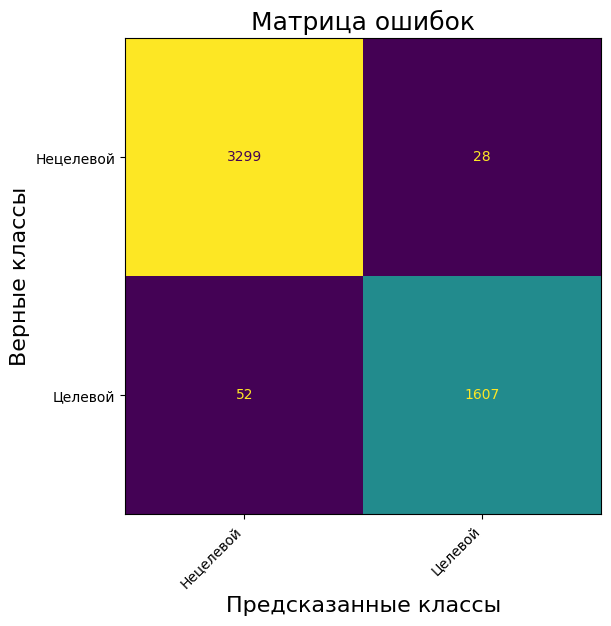

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_train, np.rint(y_predict))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на проверочной выборке

In [ ]:
# Оценка по метрике accuracy
y_predict = model.predict(x_textdata_01_val)
accuracy = accuracy_score(y_val, np.rint(y_predict))
print(f'Точность на проверочной выборке по метрике accuracy: {accuracy:5.3f}')

39/39 [==============================] - 1s 20ms/step
Точность на проверочной выборке по метрике accuracy: 0.900


In [ ]:
# Отчёт классификации
print(classification_report(y_val, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       832
           1       0.81      0.91      0.86       415

    accuracy                           0.90      1247
   macro avg       0.88      0.90      0.89      1247
weighted avg       0.91      0.90      0.90      1247



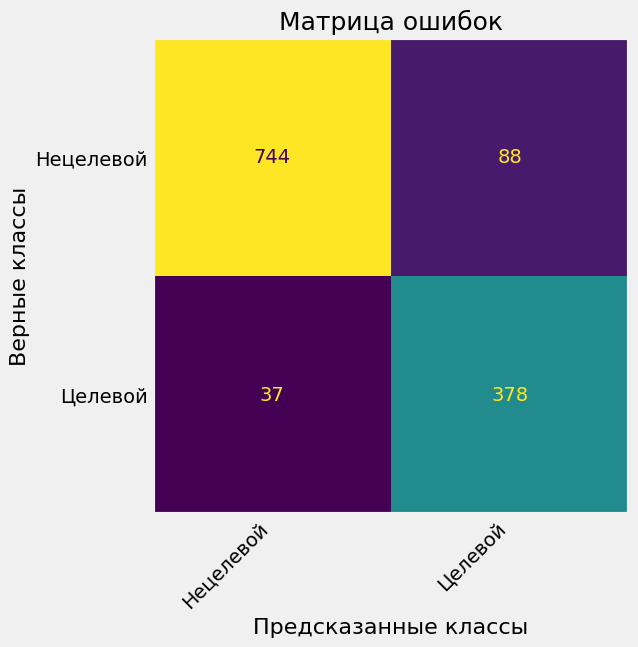

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_val, np.rint(y_predict))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на тестовой выборке

In [ ]:
# Оценка по метрике accuracy
y_predict = model.predict(x_textdata_01_test)
accuracy = accuracy_score(y_test, np.rint(y_predict))
print(f'Точность на тестовой выборке по метрике accuracy: {accuracy:5.3f}')

22/22 [==============================] - 0s 14ms/step
Точность на тестовой выборке по метрике accuracy: 0.887


In [ ]:
# Отчёт классификации
print(classification_report(y_test, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       461
           1       0.81      0.87      0.84       230

    accuracy                           0.89       691
   macro avg       0.87      0.88      0.88       691
weighted avg       0.89      0.89      0.89       691



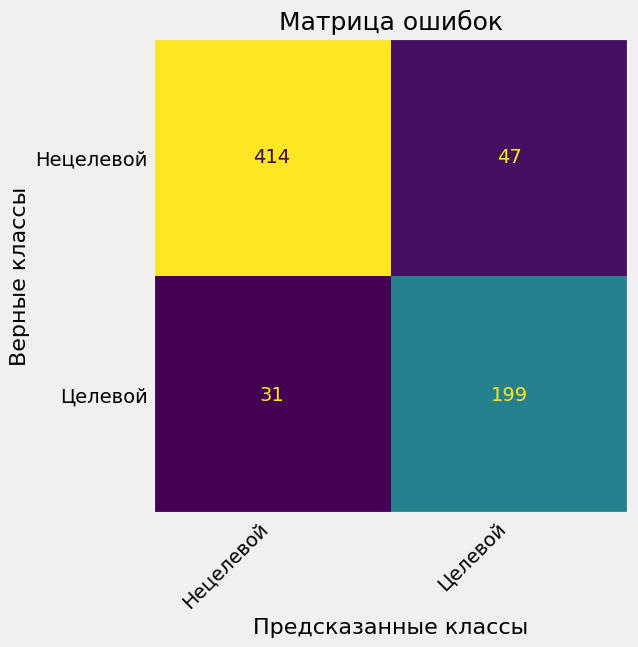

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, np.rint(y_predict))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

#### CLS-эмбеддинги

In [ ]:
# Создание модели нейронной сети
model = create_model(x_textdata_embed_bert_cls_train.shape[1])

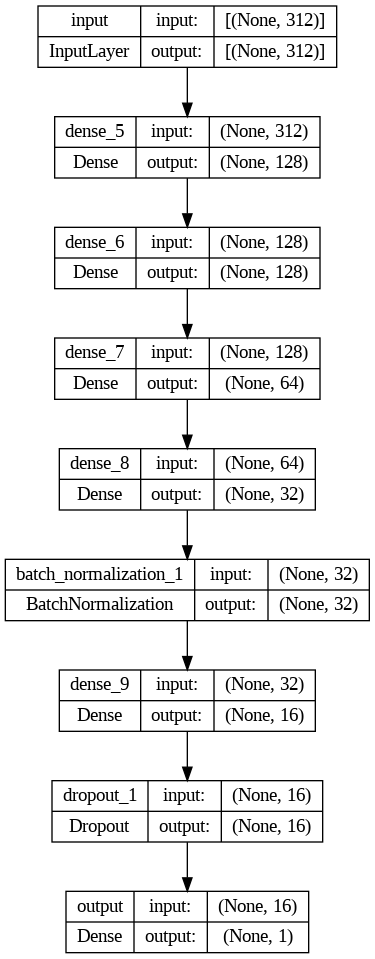

In [ ]:
# Архитектура нейронной сети
plot_model(model, show_shapes=True)

In [ ]:
# Коллбэки
save_best_callback = ModelCheckpoint(filepath='./',
                                     monitor='val_accuracy',
                                     verbose=1,
                                     mode='max',
                                     save_weights_only=True,
                                     save_best_only=True)
early_stop_callback =  EarlyStopping(monitor='val_accuracy',
                                     patience=20)

In [ ]:
# Компиляция модели нейронной сети
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Обучение модели нейронной сети
history = model.fit(x_textdata_embed_bert_cls_train, y_train,
                    validation_data=(x_textdata_embed_bert_cls_val, y_val),
                    batch_size=64,
                    epochs=30,
                    verbose=1,
                    shuffle=True,
                    class_weight={0:class_weights[0], 1:class_weights[1]},
                    callbacks=[save_best_callback, early_stop_callback])

Epoch 1/30
74/78 [===========================>..] - ETA: 0s - loss: 0.5334 - accuracy: 0.7312
Epoch 1: val_accuracy improved from -inf to 0.81556, saving model to ./
78/78 [==============================] - 3s 10ms/step - loss: 0.5306 - accuracy: 0.7339 - val_loss: 0.6637 - val_accuracy: 0.8156
Epoch 2/30
78/78 [==============================] - ETA: 0s - loss: 0.4283 - accuracy: 0.8207
Epoch 2: val_accuracy improved from 0.81556 to 0.85405, saving model to ./
78/78 [==============================] - 1s 6ms/step - loss: 0.4283 - accuracy: 0.8207 - val_loss: 0.6259 - val_accuracy: 0.8540
Epoch 3/30
75/78 [===========================>..] - ETA: 0s - loss: 0.3893 - accuracy: 0.8475
Epoch 3: val_accuracy improved from 0.85405 to 0.86287, saving model to ./
78/78 [==============================] - 1s 7ms/step - loss: 0.3876 - accuracy: 0.8482 - val_loss: 0.5793 - val_accuracy: 0.8629
Epoch 4/30
69/78 [=========================>....] - ETA: 0s - loss: 0.3645 - accuracy: 0.8560
Epoch 4: val_a

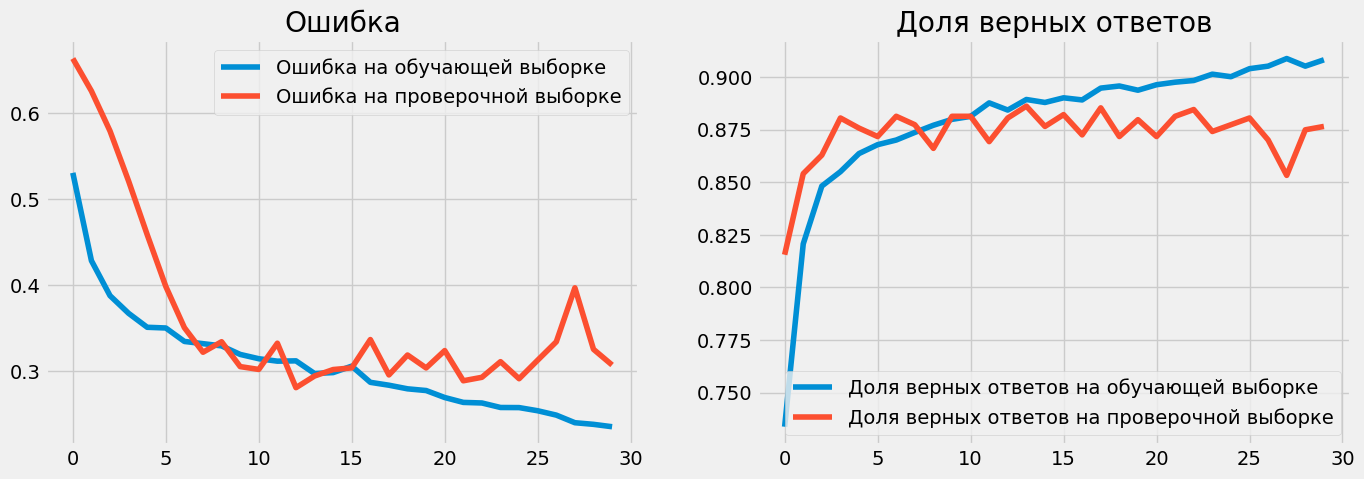

In [ ]:
# График процесса обучения
plot_history(history, 'loss', 'accuracy')

In [ ]:
# Загрузка лучших весов
model.load_weights('./')

In [ ]:
# Сохранение модели
model.save(model_path + 'model_embed_bert_cls_acc.keras')

##### Проверка работы модели на обучающей выборке

In [ ]:
# Оценка по метрике accuracy
y_predict = model.predict(x_textdata_embed_bert_cls_train)
accuracy = accuracy_score(y_train, np.rint(y_predict))
print(f'Точность на обучающей выборке по метрике accuracy: {accuracy:5.3f}')

156/156 [==============================] - 1s 4ms/step
Точность на обучающей выборке по метрике accuracy: 0.897


In [ ]:
# Отчёт классификации
print(classification_report(y_train, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3327
           1       0.80      0.92      0.86      1659

    accuracy                           0.90      4986
   macro avg       0.88      0.90      0.89      4986
weighted avg       0.91      0.90      0.90      4986



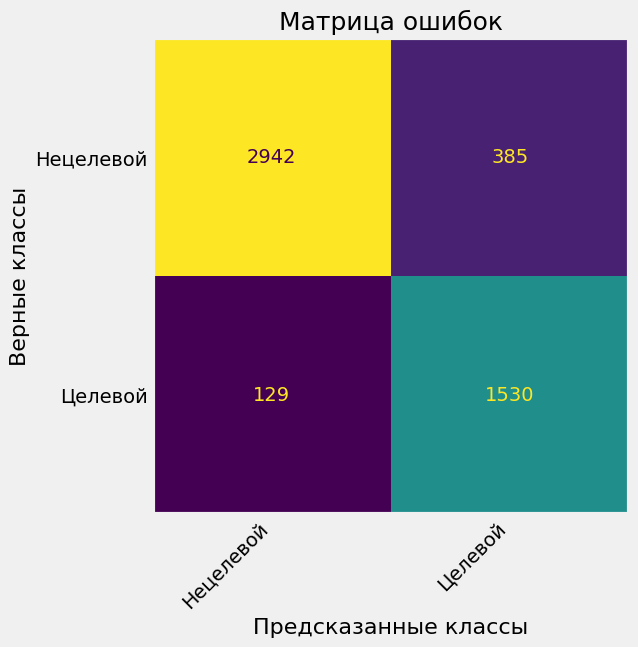

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_train, np.rint(y_predict))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на проверочной выборке

In [ ]:
# Оценка по метрике accuracy
y_predict = model.predict(x_textdata_embed_bert_cls_val)
accuracy = accuracy_score(y_val, np.rint(y_predict))
print(f'Точность на проверочной выборке по метрике accuracy: {accuracy:5.3f}')

39/39 [==============================] - 0s 2ms/step
Точность на проверочной выборке по метрике accuracy: 0.886


In [ ]:
# Отчёт классификации
print(classification_report(y_val, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       832
           1       0.78      0.92      0.84       415

    accuracy                           0.89      1247
   macro avg       0.87      0.89      0.88      1247
weighted avg       0.90      0.89      0.89      1247



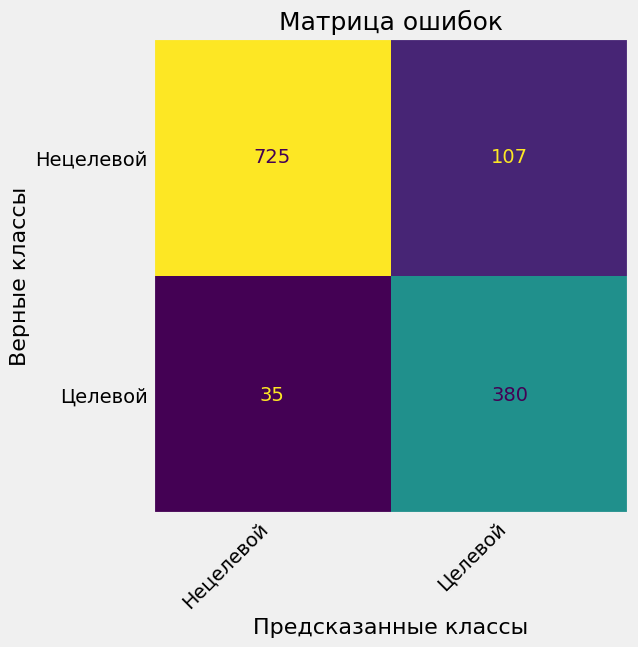

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_val, np.rint(y_predict))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на тестовой выборке

In [ ]:
# Оценка по метрике accuracy
y_predict = model.predict(x_textdata_embed_bert_cls_test)
accuracy = accuracy_score(y_test, np.rint(y_predict))
print(f'Точность на тестовой выборке по метрике accuracy: {accuracy:5.3f}')

22/22 [==============================] - 0s 3ms/step
Точность на тестовой выборке по метрике accuracy: 0.870


In [ ]:
# Отчёт классификации
print(classification_report(y_test, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       461
           1       0.76      0.89      0.82       230

    accuracy                           0.87       691
   macro avg       0.85      0.87      0.86       691
weighted avg       0.88      0.87      0.87       691



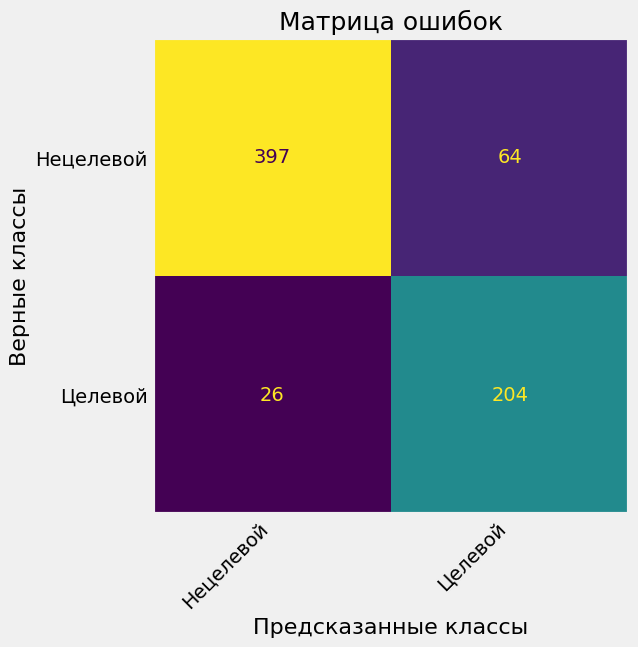

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, np.rint(y_predict))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

## Нейронная сеть на текстовых данных (архитектура прошлой недели)

In [5]:
# Загрузка данных
with open(preprocessed_data_path + 'x_textdata_01_train.pkl', 'rb') as f:
  x_textdata_01_train = pkl.load(f)

with open(preprocessed_data_path + 'x_textdata_01_val.pkl', 'rb') as f:
  x_textdata_01_val = pkl.load(f)

with open(preprocessed_data_path + 'x_textdata_01_test.pkl', 'rb') as f:
  x_textdata_01_test = pkl.load(f)

with open(preprocessed_data_path + 'x_textdata_embed_bert_cls_train.pkl', 'rb') as f:
  x_textdata_embed_bert_cls_train = pkl.load(f)

with open(preprocessed_data_path + 'x_textdata_embed_bert_cls_val.pkl', 'rb') as f:
  x_textdata_embed_bert_cls_val = pkl.load(f)

with open(preprocessed_data_path + 'x_textdata_embed_bert_cls_test.pkl', 'rb') as f:
  x_textdata_embed_bert_cls_test = pkl.load(f)

with open(preprocessed_data_path + 'y_train.pkl', 'rb') as f:
  y_train = pkl.load(f)

with open(preprocessed_data_path + 'y_val.pkl', 'rb') as f:
  y_val = pkl.load(f)

with open(preprocessed_data_path + 'y_test.pkl', 'rb') as f:
  y_test = pkl.load(f)

with open(preprocessed_data_path + 'class_weights.pkl', 'rb') as f:
  class_weights = pkl.load(f)

In [6]:
# Функция для отрисовки графика процесса обучения нейронной сети
def plot_history(history, loss, metric):
  fig, ax = plt.subplots(1, 2, figsize=(15, 5))
  parameters = [loss, metric]
  labels = ['Ошибка', 'Доля верных ответов']
  for i in range(2):
    ax[i].plot(history.history[parameters[i]],          label=labels[i] + ' на обучающей выборке')
    ax[i].plot(history.history['val_' + parameters[i]], label=labels[i] + ' на проверочной выборке')
    ax[i].set_title(labels[i])
    ax[i].legend()
  plt.show()

In [7]:
# Функция для создания модели нейронной сети
def create_model(input_shape):
  input  = Input(shape=(input_shape),
                 name='input')
  x      = Dense(500, activation='relu') (input)
  x      = BatchNormalization()              (x)
  x      = Dropout(0.6)                      (x)
  x      = Dense(32,  activation='relu')     (x)
  x      = BatchNormalization()              (x)
  x      = Dropout(0.1)                      (x)
  output = Dense(1,    activation='sigmoid',
                 name='output')              (x)
  return Model([input], output)

### Метрика `AUC`

#### Bag of Words

In [11]:
# Создание модели нейронной сети
model = create_model(x_textdata_01_train.shape[1])

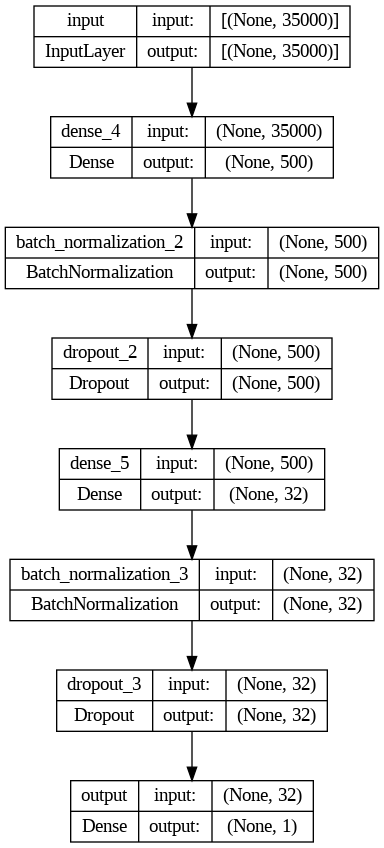

In [12]:
# Архитектура нейронной сети
plot_model(model, show_shapes=True)

In [13]:
# Коллбэки
save_best_callback = ModelCheckpoint(filepath='./',
                                     monitor='val_auc',
                                     verbose=1,
                                     mode='max',
                                     save_weights_only=True,
                                     save_best_only=True)
early_stop_callback =  EarlyStopping(monitor='val_auc',
                                     patience=20)

In [14]:
# Компиляция модели нейронной сети
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['AUC'])

In [15]:
# Обучение модели нейронной сети
history = model.fit(x_textdata_01_train, y_train,
                    validation_data=(x_textdata_01_val, y_val),
                    batch_size=64,
                    epochs=30,
                    verbose=1,
                    shuffle=True,
                    class_weight={0:class_weights[0], 1:class_weights[1]},
                    callbacks=[save_best_callback, early_stop_callback])

Epoch 1/30
78/78 [==============================] - ETA: 0s - loss: 0.4029 - auc: 0.9086
Epoch 1: val_auc improved from -inf to 0.95274, saving model to ./
78/78 [==============================] - 41s 504ms/step - loss: 0.4029 - auc: 0.9086 - val_loss: 0.8722 - val_auc: 0.9527
Epoch 2/30
78/78 [==============================] - ETA: 0s - loss: 0.2365 - auc: 0.9690
Epoch 2: val_auc improved from 0.95274 to 0.95570, saving model to ./
78/78 [==============================] - 34s 440ms/step - loss: 0.2365 - auc: 0.9690 - val_loss: 0.9259 - val_auc: 0.9557
Epoch 3/30
78/78 [==============================] - ETA: 0s - loss: 0.1797 - auc: 0.9830
Epoch 3: val_auc improved from 0.95570 to 0.95650, saving model to ./
78/78 [==============================] - 32s 411ms/step - loss: 0.1797 - auc: 0.9830 - val_loss: 0.8186 - val_auc: 0.9565
Epoch 4/30
78/78 [==============================] - ETA: 0s - loss: 0.1429 - auc: 0.9889
Epoch 4: val_auc improved from 0.95650 to 0.95831, saving model to ./
7

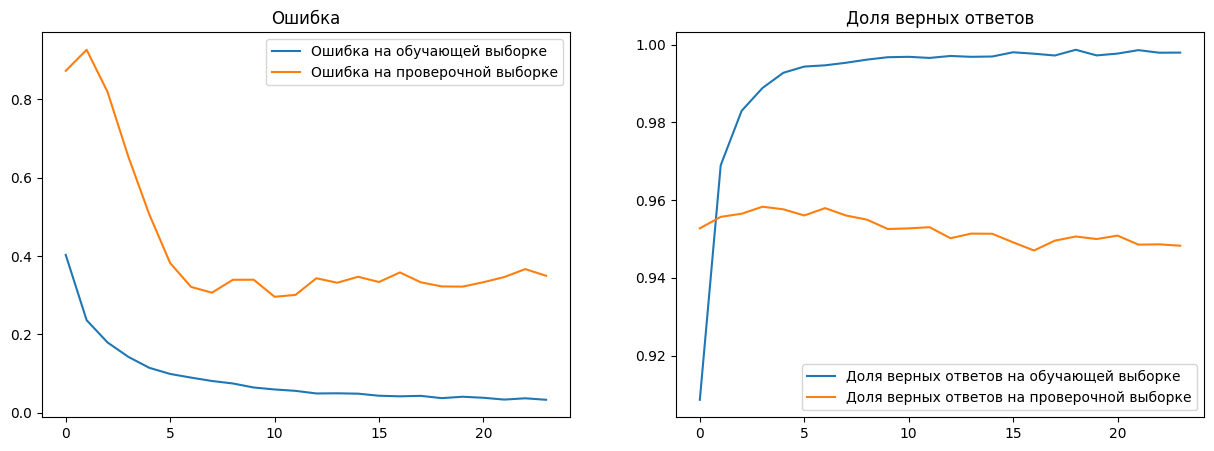

In [16]:
# График процесса обучения
plot_history(history, 'loss', 'auc')

In [17]:
# Загрузка лучших весов
model.load_weights('./')

In [18]:
# Сохранение модели
model.save(model_path + 'model_BoW_auc2.keras')

In [6]:
# Загрузка модели
model = load_model(model_path + 'model_BoW_auc2.keras')

##### Проверка работы модели на обучающей выборке

In [20]:
# Оценка по метрике ROC-AUC
y_predict = model.predict(x_textdata_01_train)
roc_auc = roc_auc_score(y_train, y_predict)
print(f'Точность на обучающей выборке по метрике ROC-AUC: {roc_auc:5.3f}')

156/156 [==============================] - 8s 47ms/step
Точность на обучающей выборке по метрике ROC-AUC: 0.990


In [21]:
# Отчёт классификации
threshold = 0.5
print(classification_report(y_train, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.55      0.71      3327
           1       0.53      0.99      0.69      1659

    accuracy                           0.70      4986
   macro avg       0.76      0.77      0.70      4986
weighted avg       0.84      0.70      0.70      4986



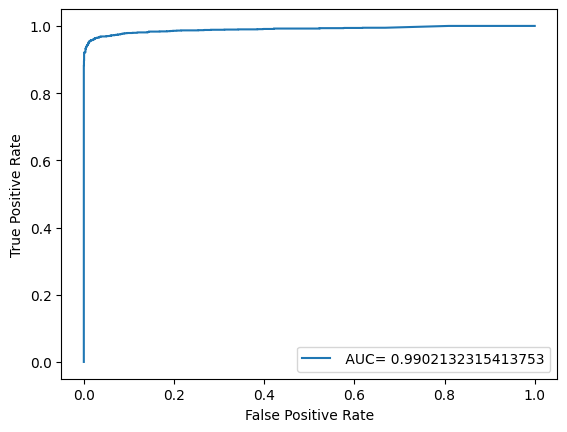

In [22]:
# ROC-кривая
fpr, tpr, _ = roc_curve(y_train, y_predict)
plt.plot(fpr, tpr, label=' AUC= ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

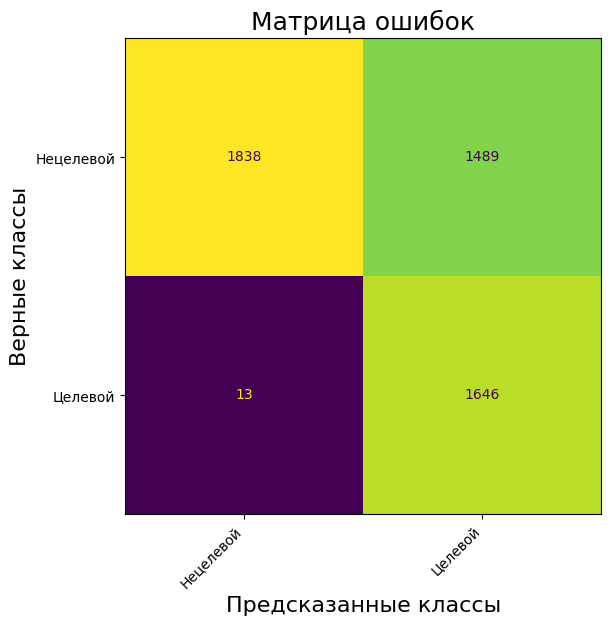

In [23]:
# Построение матрицы ошибок
cm = confusion_matrix(y_train, (y_predict > threshold).astype(int))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на проверочной выборке

In [8]:
# Оценка по метрике ROC-AUC
y_predict = model.predict(x_textdata_01_val)
roc_auc = roc_auc_score(y_val, y_predict)
print(f'Точность на проверочной выборке по метрике ROC-AUC: {roc_auc:5.3f}')

39/39 [==============================] - 3s 69ms/step
Точность на проверочной выборке по метрике ROC-AUC: 0.958


In [9]:
# Отчёт классификации
threshold = 0.5
print(classification_report(y_val, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.50      0.67       832
           1       0.50      0.99      0.66       415

    accuracy                           0.66      1247
   macro avg       0.74      0.75      0.66      1247
weighted avg       0.83      0.66      0.67      1247



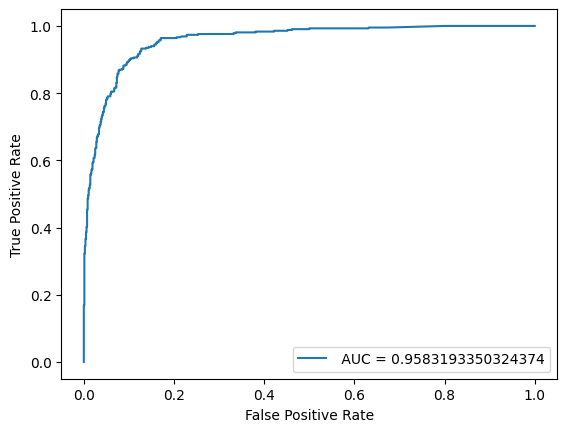

In [11]:
# ROC-кривая
fpr, tpr, _ = roc_curve(y_val, y_predict)
plt.plot(fpr, tpr, label=' AUC = ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

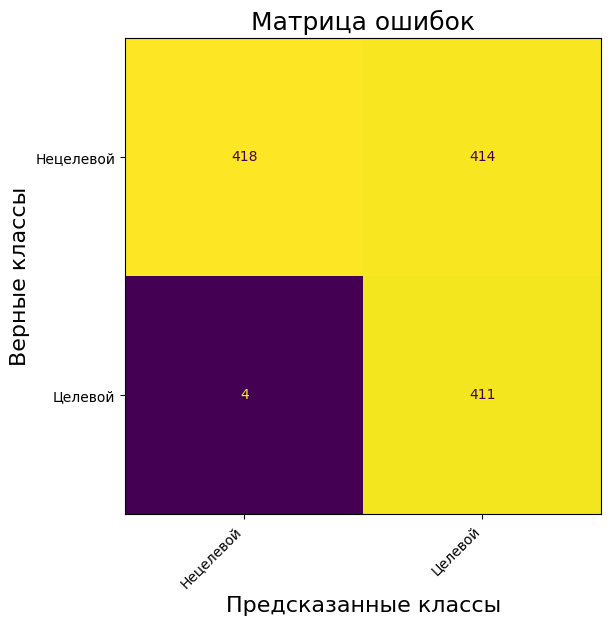

In [12]:
# Построение матрицы ошибок
cm = confusion_matrix(y_val, (y_predict > threshold).astype(int))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на тестовой выборке

In [7]:
# Оценка по метрике ROC-AUC
y_predict = model.predict(x_textdata_01_test)
roc_auc = roc_auc_score(y_test, y_predict)
print(f'Точность на тестовой выборке по метрике ROC-AUC: {roc_auc:5.3f}')

22/22 [==============================] - 2s 77ms/step
Точность на тестовой выборке по метрике ROC-AUC: 0.947


In [8]:
# Отчёт классификации
threshold = 0.5
print(classification_report(y_test, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.98      0.50      0.67       461
           1       0.50      0.98      0.66       230

    accuracy                           0.66       691
   macro avg       0.74      0.74      0.66       691
weighted avg       0.82      0.66      0.66       691



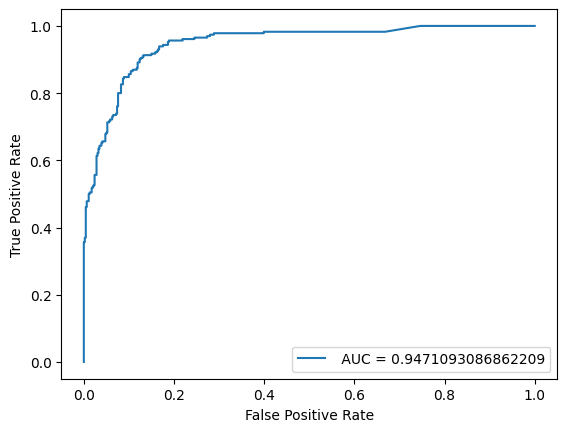

In [9]:
# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, label=' AUC = ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

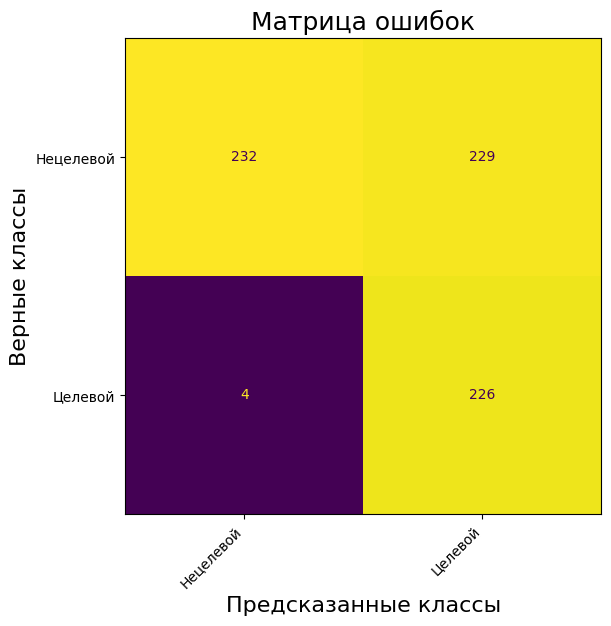

In [10]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, (y_predict > threshold).astype(int))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

#### CLS-эмбеддинги

In [8]:
# Создание модели нейронной сети
model = create_model(x_textdata_embed_bert_cls_train.shape[1])

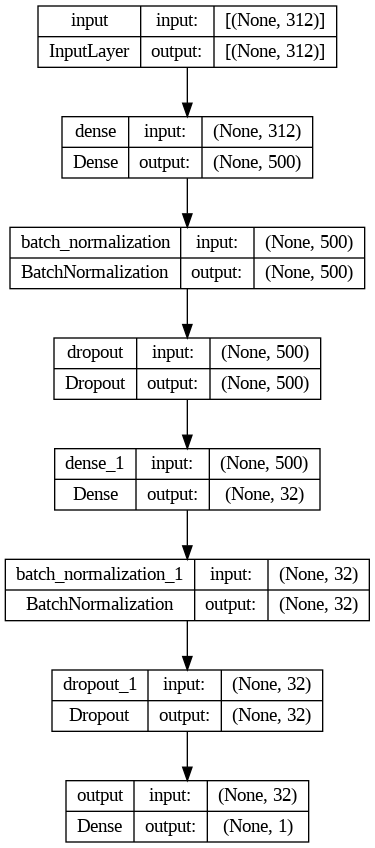

In [9]:
# Архитектура нейронной сети
plot_model(model, show_shapes=True)

In [10]:
# Коллбэки
save_best_callback = ModelCheckpoint(filepath='./',
                                     monitor='val_auc',
                                     verbose=1,
                                     mode='max',
                                     save_weights_only=True,
                                     save_best_only=True)
early_stop_callback =  EarlyStopping(monitor='val_auc',
                                     patience=20)

In [11]:
# Компиляция модели нейронной сети
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['AUC'])

In [12]:
# Обучение модели нейронной сети
history = model.fit(x_textdata_embed_bert_cls_train, y_train,
                    validation_data=(x_textdata_embed_bert_cls_val, y_val),
                    batch_size=64,
                    epochs=30,
                    verbose=1,
                    shuffle=True,
                    class_weight={0:class_weights[0], 1:class_weights[1]},
                    callbacks=[save_best_callback, early_stop_callback])

Epoch 1/30
72/78 [==========================>...] - ETA: 0s - loss: 0.4975 - auc: 0.8538
Epoch 1: val_auc improved from -inf to 0.91547, saving model to ./
78/78 [==============================] - 3s 12ms/step - loss: 0.4972 - auc: 0.8541 - val_loss: 0.6506 - val_auc: 0.9155
Epoch 2/30
72/78 [==========================>...] - ETA: 0s - loss: 0.4012 - auc: 0.9089
Epoch 2: val_auc improved from 0.91547 to 0.93060, saving model to ./
78/78 [==============================] - 1s 7ms/step - loss: 0.4040 - auc: 0.9074 - val_loss: 0.6015 - val_auc: 0.9306
Epoch 3/30
74/78 [===========================>..] - ETA: 0s - loss: 0.3836 - auc: 0.9152
Epoch 3: val_auc improved from 0.93060 to 0.93547, saving model to ./
78/78 [==============================] - 1s 9ms/step - loss: 0.3835 - auc: 0.9152 - val_loss: 0.5510 - val_auc: 0.9355
Epoch 4/30
74/78 [===========================>..] - ETA: 0s - loss: 0.3715 - auc: 0.9186
Epoch 4: val_auc improved from 0.93547 to 0.93838, saving model to ./
78/78 [==

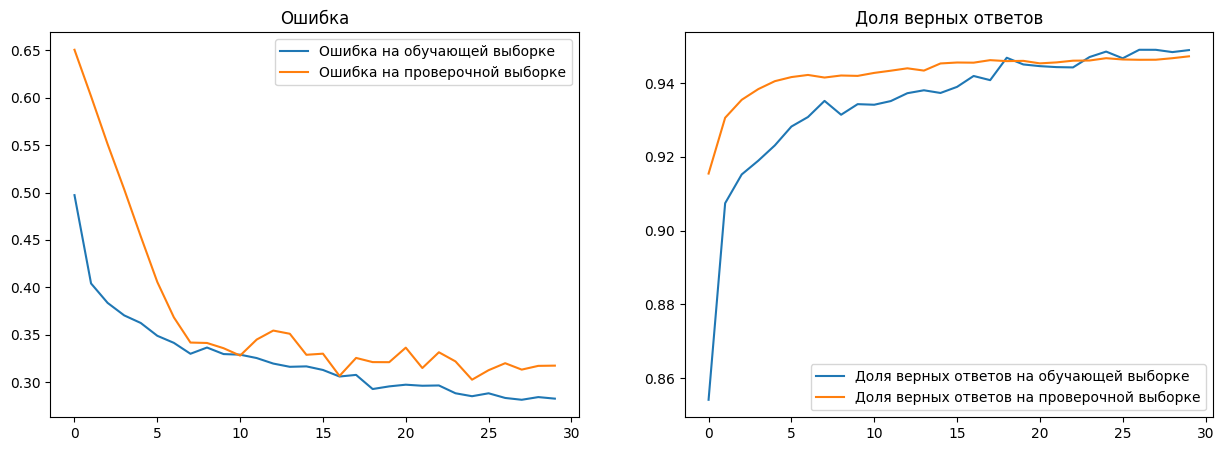

In [13]:
# График процесса обучения
plot_history(history, 'loss', 'auc')

In [14]:
# Загрузка лучших весов
model.load_weights('./')

In [15]:
# Сохранение модели
model.save(model_path + 'model_embed_bert_cls_auc2.keras')

In [6]:
# Загрузка модели
model = load_model(model_path + 'model_embed_bert_cls_auc2.keras')

##### Проверка работы модели на обучающей выборке

In [17]:
# Оценка по метрике ROC-AUC
y_predict = model.predict(x_textdata_embed_bert_cls_train)
roc_auc = roc_auc_score(y_train, y_predict)
print(f'Точность на обучающей выборке по метрике ROC-AUC: {roc_auc:5.3f}')

156/156 [==============================] - 0s 2ms/step
Точность на обучающей выборке по метрике ROC-AUC: 0.962


In [18]:
# Отчёт классификации
threshold = 0.5
print(classification_report(y_train, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3327
           1       0.78      0.95      0.86      1659

    accuracy                           0.90      4986
   macro avg       0.88      0.91      0.89      4986
weighted avg       0.91      0.90      0.90      4986



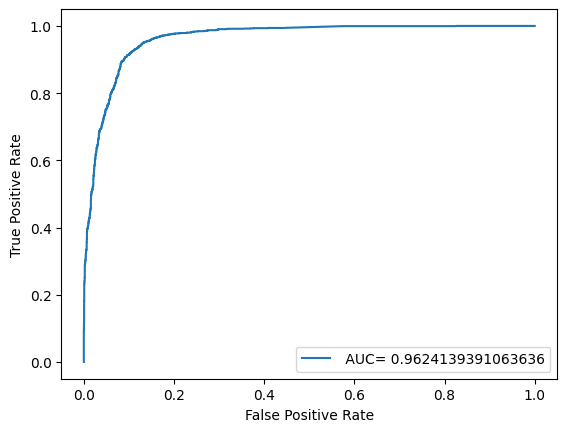

In [19]:
# ROC-кривая
fpr, tpr, _ = roc_curve(y_train, y_predict)
plt.plot(fpr, tpr, label=' AUC= ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

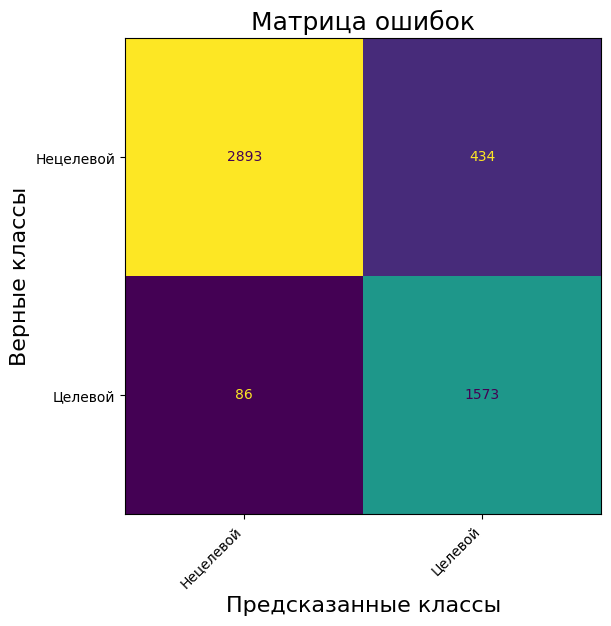

In [20]:
# Построение матрицы ошибок
cm = confusion_matrix(y_train, (y_predict > threshold).astype(int))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на проверочной выборке

In [7]:
# Оценка по метрике ROC-AUC
y_predict = model.predict(x_textdata_embed_bert_cls_val)
roc_auc = roc_auc_score(y_val, y_predict)
print(f'Точность на проверочной выборке по метрике ROC-AUC: {roc_auc:5.3f}')

39/39 [==============================] - 1s 6ms/step
Точность на проверочной выборке по метрике ROC-AUC: 0.947


In [8]:
# Отчёт классификации
threshold = 0.5
print(classification_report(y_val, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       832
           1       0.76      0.94      0.84       415

    accuracy                           0.88      1247
   macro avg       0.86      0.89      0.87      1247
weighted avg       0.90      0.88      0.88      1247



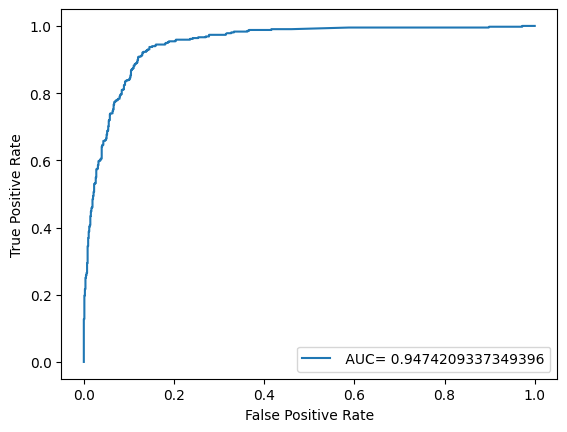

In [9]:
# ROC-кривая
fpr, tpr, _ = roc_curve(y_val, y_predict)
plt.plot(fpr, tpr, label=' AUC= ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

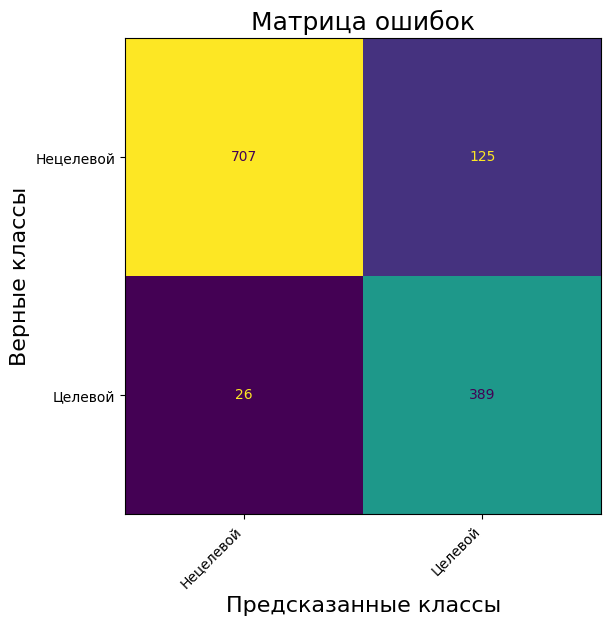

In [10]:
# Построение матрицы ошибок
cm = confusion_matrix(y_val, (y_predict > threshold).astype(int))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на тестовой выборке

In [7]:
# Оценка по метрике ROC-AUC
y_predict = model.predict(x_textdata_embed_bert_cls_test)
roc_auc = roc_auc_score(y_test, y_predict)
print(f'Точность на тестовой выборке по метрике ROC-AUC: {roc_auc:5.3f}')

22/22 [==============================] - 0s 2ms/step
Точность на тестовой выборке по метрике ROC-AUC: 0.945


In [8]:
# Отчёт классификации
threshold = 0.5
print(classification_report(y_test, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.86      0.90       461
           1       0.76      0.92      0.83       230

    accuracy                           0.88       691
   macro avg       0.86      0.89      0.87       691
weighted avg       0.89      0.88      0.88       691



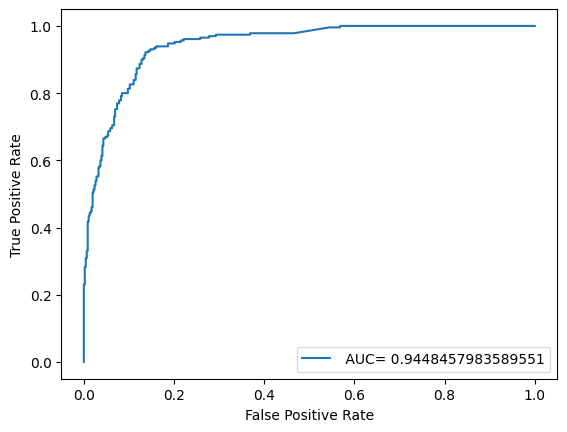

In [9]:
# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, label=' AUC= ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

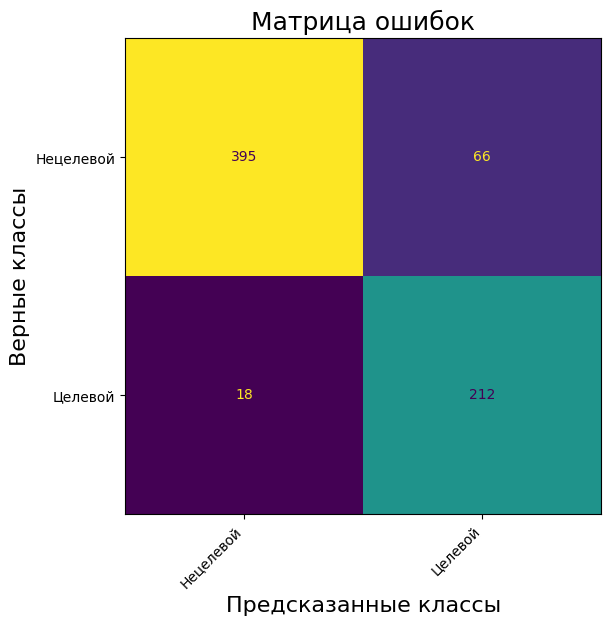

In [10]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, (y_predict > threshold).astype(int))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

### Метрика `accuracy`

#### Bag of Words

In [8]:
# Создание модели нейронной сети
model = create_model(x_textdata_01_train.shape[1])

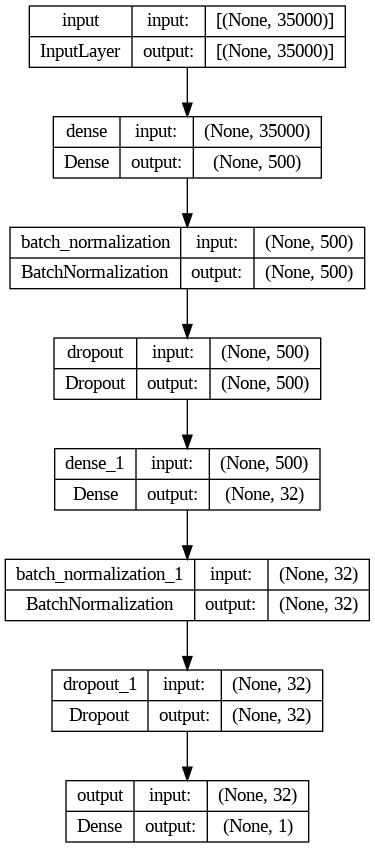

In [9]:
# Архитектура нейронной сети
plot_model(model, show_shapes=True)

In [10]:
# Коллбэки
save_best_callback = ModelCheckpoint(filepath='./',
                                     monitor='val_accuracy',
                                     verbose=1,
                                     mode='max',
                                     save_weights_only=True,
                                     save_best_only=True)
early_stop_callback =  EarlyStopping(monitor='val_accuracy',
                                     patience=20)

In [11]:
# Компиляция модели нейронной сети
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# Обучение модели нейронной сети
history = model.fit(x_textdata_01_train, y_train,
                    validation_data=(x_textdata_01_val, y_val),
                    batch_size=64,
                    epochs=30,
                    verbose=1,
                    shuffle=True,
                    class_weight={0:class_weights[0], 1:class_weights[1]},
                    callbacks=[save_best_callback, early_stop_callback])

Epoch 1/30
78/78 [==============================] - ETA: 0s - loss: 0.3863 - accuracy: 0.8494
Epoch 1: val_accuracy improved from -inf to 0.89334, saving model to ./
78/78 [==============================] - 40s 464ms/step - loss: 0.3863 - accuracy: 0.8494 - val_loss: 0.5389 - val_accuracy: 0.8933
Epoch 2/30
78/78 [==============================] - ETA: 0s - loss: 0.2409 - accuracy: 0.9108
Epoch 2: val_accuracy improved from 0.89334 to 0.89415, saving model to ./
78/78 [==============================] - 60s 776ms/step - loss: 0.2409 - accuracy: 0.9108 - val_loss: 0.4759 - val_accuracy: 0.8941
Epoch 3/30
78/78 [==============================] - ETA: 0s - loss: 0.1820 - accuracy: 0.9336
Epoch 3: val_accuracy improved from 0.89415 to 0.89976, saving model to ./
78/78 [==============================] - 44s 561ms/step - loss: 0.1820 - accuracy: 0.9336 - val_loss: 0.4133 - val_accuracy: 0.8998
Epoch 4/30
78/78 [==============================] - ETA: 0s - loss: 0.1377 - accuracy: 0.9589
Epoch 

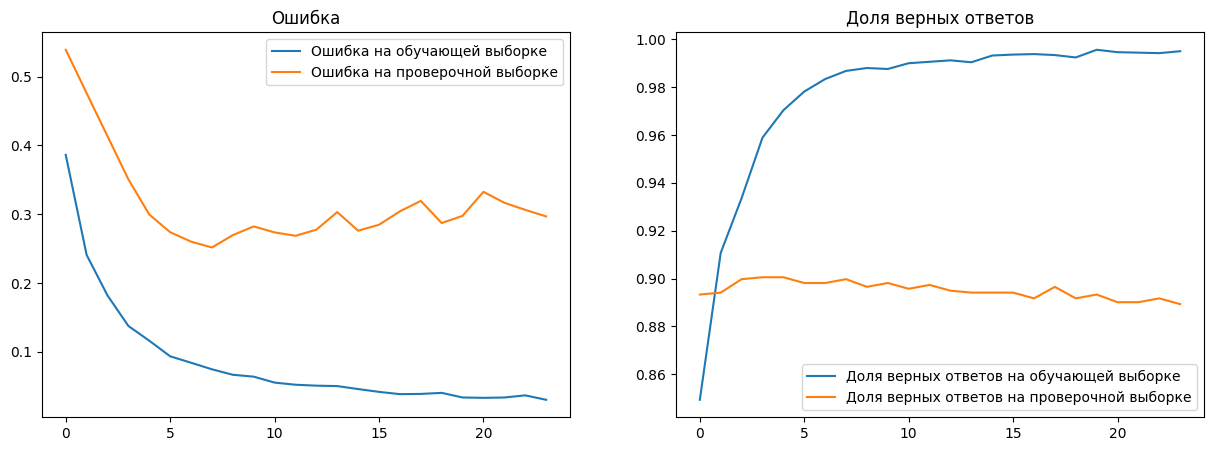

In [13]:
# График процесса обучения
plot_history(history, 'loss', 'accuracy')

In [14]:
# Загрузка лучших весов
model.load_weights('./')

In [15]:
# Сохранение модели
model.save(model_path + 'model_BoW_acc2.keras')

In [6]:
# Загрузка модели
model = load_model(model_path + 'model_BoW_acc2.keras')

##### Проверка работы модели на обучающей выборке

In [17]:
# Оценка по метрике accuracy
y_predict = model.predict(x_textdata_01_train)
accuracy = accuracy_score(y_train, np.rint(y_predict))
print(f'Точность на обучающей выборке по метрике accuracy: {accuracy:5.3f}')

156/156 [==============================] - 6s 39ms/step
Точность на обучающей выборке по метрике accuracy: 0.977


In [18]:
# Отчёт классификации
print(classification_report(y_train, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3327
           1       0.99      0.94      0.96      1659

    accuracy                           0.98      4986
   macro avg       0.98      0.97      0.97      4986
weighted avg       0.98      0.98      0.98      4986



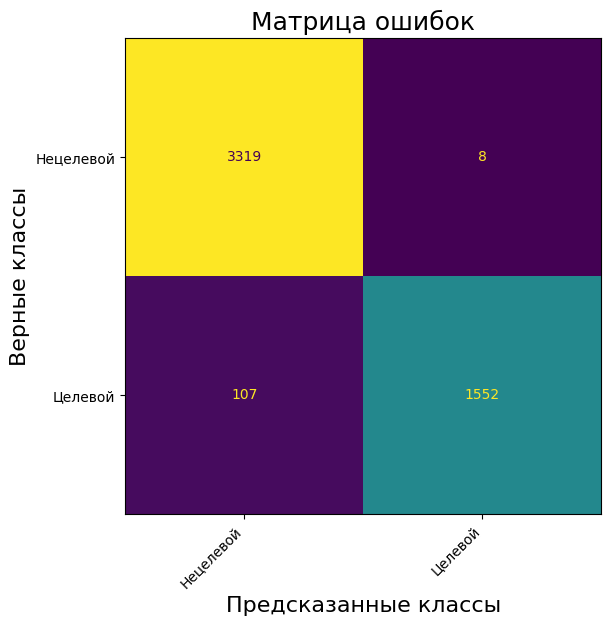

In [19]:
# Построение матрицы ошибок
cm = confusion_matrix(y_train, np.rint(y_predict))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на проверочной выборке

In [8]:
# Оценка по метрике accuracy
y_predict = model.predict(x_textdata_01_val)
accuracy = accuracy_score(y_val, np.rint(y_predict))
print(f'Точность на проверочной выборке по метрике accuracy: {accuracy:5.3f}')

39/39 [==============================] - 2s 34ms/step
Точность на проверочной выборке по метрике accuracy: 0.901


In [ ]:
# Отчёт классификации
print(classification_report(y_val, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       832
           1       0.81      0.91      0.86       415

    accuracy                           0.90      1247
   macro avg       0.88      0.90      0.89      1247
weighted avg       0.91      0.90      0.90      1247



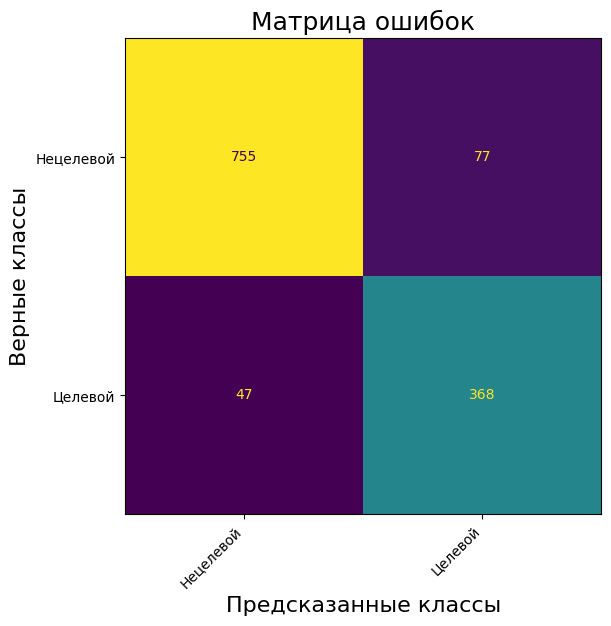

In [9]:
# Построение матрицы ошибок
cm = confusion_matrix(y_val, np.rint(y_predict))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на тестовой выборке

In [7]:
# Оценка по метрике accuracy
y_predict = model.predict(x_textdata_01_test)
accuracy = accuracy_score(y_test, np.rint(y_predict))
print(f'Точность на тестовой выборке по метрике accuracy: {accuracy:5.3f}')

22/22 [==============================] - 2s 80ms/step
Точность на тестовой выборке по метрике accuracy: 0.890


In [8]:
# Отчёт классификации
print(classification_report(y_test, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       461
           1       0.83      0.84      0.84       230

    accuracy                           0.89       691
   macro avg       0.88      0.88      0.88       691
weighted avg       0.89      0.89      0.89       691



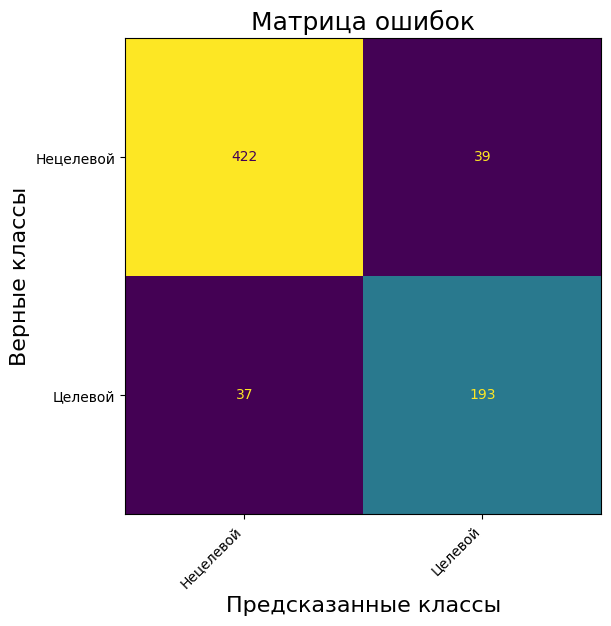

In [9]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, np.rint(y_predict))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

#### CLS-эмбеддинги

In [8]:
# Создание модели нейронной сети
model = create_model(x_textdata_embed_bert_cls_train.shape[1])

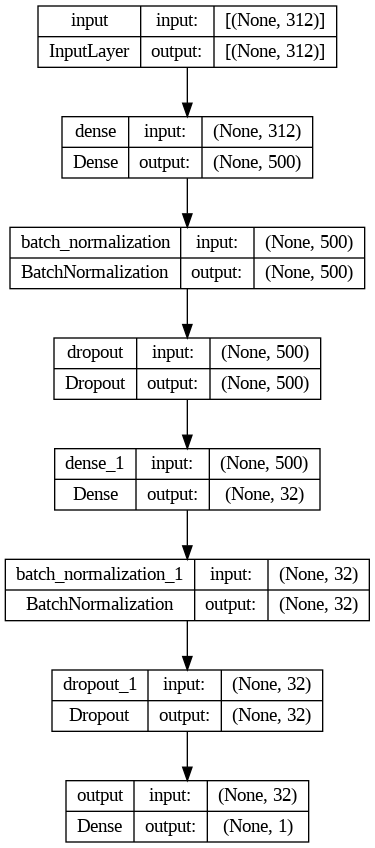

In [9]:
# Архитектура нейронной сети
plot_model(model, show_shapes=True)

In [10]:
# Коллбэки
save_best_callback = ModelCheckpoint(filepath='./',
                                     monitor='val_accuracy',
                                     verbose=1,
                                     mode='max',
                                     save_weights_only=True,
                                     save_best_only=True)
early_stop_callback =  EarlyStopping(monitor='val_accuracy',
                                     patience=20)

In [11]:
# Компиляция модели нейронной сети
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# Обучение модели нейронной сети
history = model.fit(x_textdata_embed_bert_cls_train, y_train,
                    validation_data=(x_textdata_embed_bert_cls_val, y_val),
                    batch_size=64,
                    epochs=30,
                    verbose=1,
                    shuffle=True,
                    class_weight={0:class_weights[0], 1:class_weights[1]},
                    callbacks=[save_best_callback, early_stop_callback])

Epoch 1/30
76/78 [============================>.] - ETA: 0s - loss: 0.5189 - accuracy: 0.7280
Epoch 1: val_accuracy improved from -inf to 0.80754, saving model to ./
78/78 [==============================] - 6s 22ms/step - loss: 0.5150 - accuracy: 0.7306 - val_loss: 0.6531 - val_accuracy: 0.8075
Epoch 2/30
72/78 [==========================>...] - ETA: 0s - loss: 0.4124 - accuracy: 0.8105
Epoch 2: val_accuracy improved from 0.80754 to 0.88051, saving model to ./
78/78 [==============================] - 1s 7ms/step - loss: 0.4119 - accuracy: 0.8097 - val_loss: 0.5952 - val_accuracy: 0.8805
Epoch 3/30
77/78 [============================>.] - ETA: 0s - loss: 0.3804 - accuracy: 0.8302
Epoch 3: val_accuracy did not improve from 0.88051
78/78 [==============================] - 1s 7ms/step - loss: 0.3805 - accuracy: 0.8297 - val_loss: 0.5439 - val_accuracy: 0.8757
Epoch 4/30
70/78 [=========================>....] - ETA: 0s - loss: 0.3709 - accuracy: 0.8400
Epoch 4: val_accuracy did not improve 

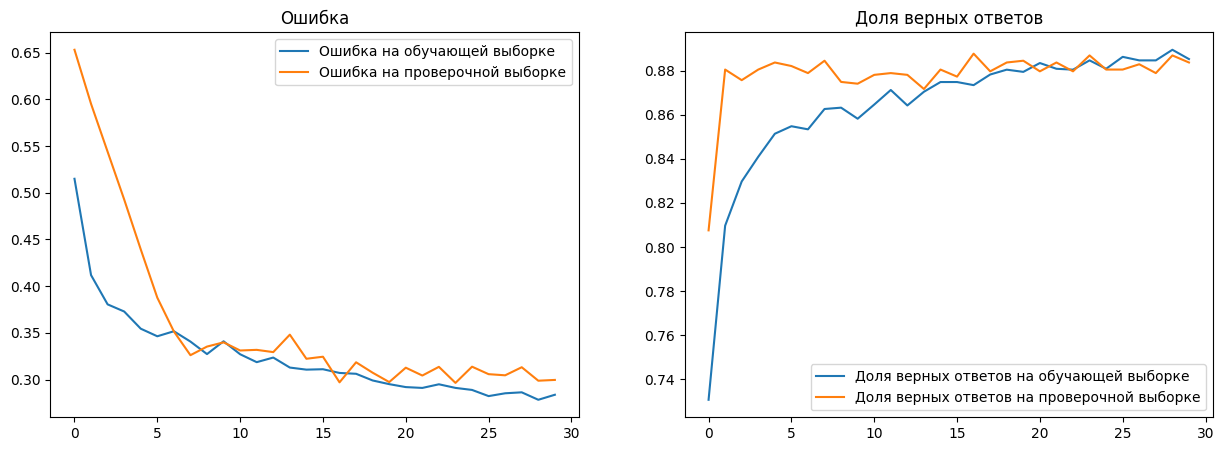

In [13]:
# График процесса обучения
plot_history(history, 'loss', 'accuracy')

In [14]:
# Загрузка лучших весов
model.load_weights('./')

In [15]:
# Сохранение модели
model.save(model_path + 'model_embed_bert_cls_acc2.keras')

In [6]:
# Загрузка модели
model = load_model(model_path + 'model_embed_bert_cls_acc2.keras')

##### Проверка работы модели на обучающей выборке

In [17]:
# Оценка по метрике accuracy
y_predict = model.predict(x_textdata_embed_bert_cls_train)
accuracy = accuracy_score(y_train, np.rint(y_predict))
print(f'Точность на обучающей выборке по метрике accuracy: {accuracy:5.3f}')

156/156 [==============================] - 1s 3ms/step
Точность на обучающей выборке по метрике accuracy: 0.896


In [18]:
# Отчёт классификации
print(classification_report(y_train, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3327
           1       0.80      0.92      0.85      1659

    accuracy                           0.90      4986
   macro avg       0.88      0.90      0.89      4986
weighted avg       0.90      0.90      0.90      4986



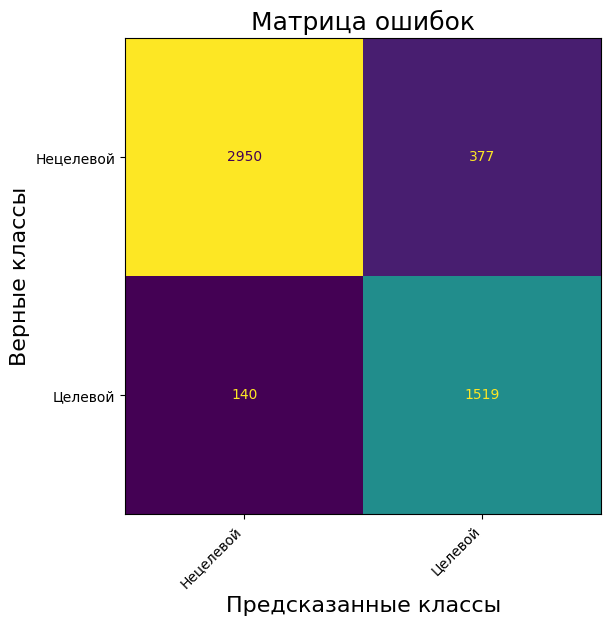

In [19]:
# Построение матрицы ошибок
cm = confusion_matrix(y_train, np.rint(y_predict))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на проверочной выборке

In [7]:
# Оценка по метрике accuracy
y_predict = model.predict(x_textdata_embed_bert_cls_val)
accuracy = accuracy_score(y_val, np.rint(y_predict))
print(f'Точность на проверочной выборке по метрике accuracy: {accuracy:5.3f}')

39/39 [==============================] - 1s 5ms/step
Точность на проверочной выборке по метрике accuracy: 0.888


In [8]:
# Отчёт классификации
print(classification_report(y_val, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       832
           1       0.79      0.91      0.84       415

    accuracy                           0.89      1247
   macro avg       0.87      0.89      0.88      1247
weighted avg       0.90      0.89      0.89      1247



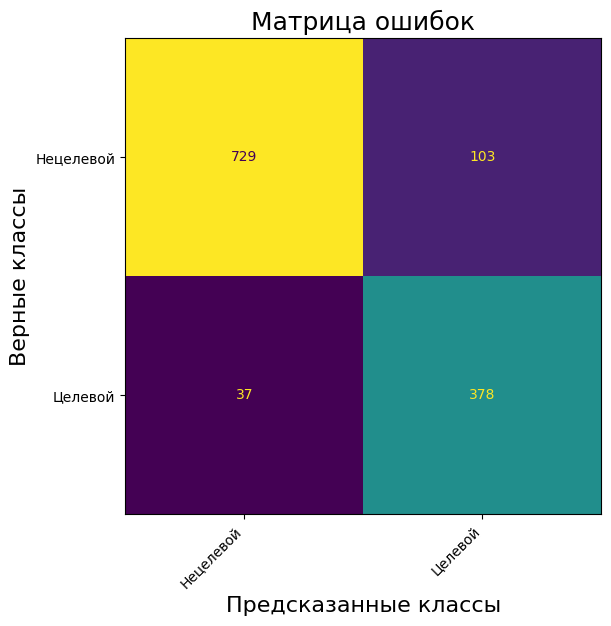

In [9]:
# Построение матрицы ошибок
cm = confusion_matrix(y_val, np.rint(y_predict))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

##### Проверка работы модели на тестовой выборке

In [7]:
# Оценка по метрике accuracy
y_predict = model.predict(x_textdata_embed_bert_cls_test)
accuracy = accuracy_score(y_test, np.rint(y_predict))
print(f'Точность на тестовой выборке по метрике accuracy: {accuracy:5.3f}')

22/22 [==============================] - 0s 2ms/step
Точность на тестовой выборке по метрике accuracy: 0.873


In [8]:
# Отчёт классификации
print(classification_report(y_test, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       461
           1       0.77      0.87      0.82       230

    accuracy                           0.87       691
   macro avg       0.85      0.87      0.86       691
weighted avg       0.88      0.87      0.87       691



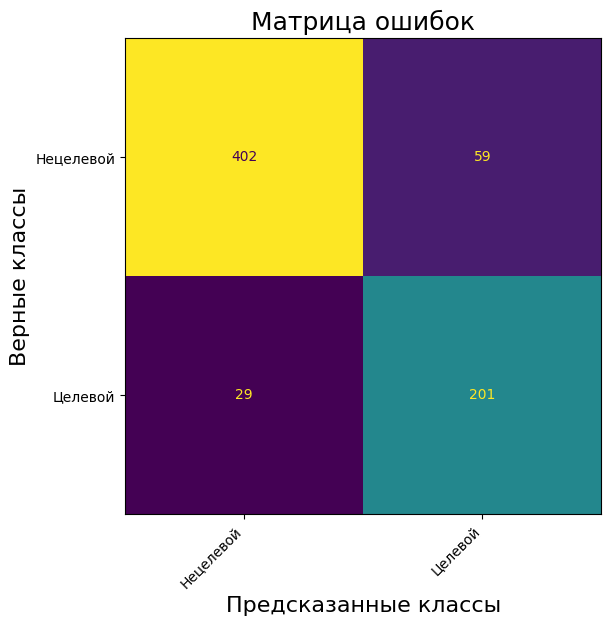

In [9]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, np.rint(y_predict))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

## Тесты

### Информация о системе

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!uname -a

Linux 5006b036dfb6 6.1.58+ #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


In [ ]:
import os
print(os.name)

posix


In [ ]:
import platform
print(platform.system())

Linux


In [ ]:
!cat /etc/*release

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.3 LTS"
PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


### Проверка работы моделей на тестовой выборке (метрика `AUC`)

In [ ]:
!pip -q install tensorflow==2.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [ ]:
# Загружаем модели
from tensorflow.keras.saving import load_model
model_path = my_drv_path + 'media108.ru/Новички/Модели/'
model_BoW_auc = load_model(model_path + 'model_BoW_auc.keras')
model_embed_bert_cls_auc = load_model(model_path + 'model_embed_bert_cls_auc.keras')

In [ ]:
# Загрузка данных
import pickle as pkl
preprocessed_data_path = my_drv_path + 'media108.ru/Предобработанные данные/'
with open(preprocessed_data_path + 'x_textdata_01_test.pkl', 'rb') as f:
  x_textdata_01_test = pkl.load(f)
with open(preprocessed_data_path + 'x_textdata_embed_bert_cls_test.pkl', 'rb') as f:
  x_textdata_embed_bert_cls_test = pkl.load(f)
with open(preprocessed_data_path + 'y_test.pkl', 'rb') as f:
  y_test = pkl.load(f)

In [ ]:
# Оценка по метрике ROC-AUC
from sklearn.metrics import roc_auc_score
y_predict_01 = model_BoW_auc.predict(x_textdata_01_test)
roc_auc_01 = roc_auc_score(y_test, y_predict_01)
y_predict_embed_bert_cls = model_embed_bert_cls_auc.predict(x_textdata_embed_bert_cls_test)
roc_auc_embed_bert_cls = roc_auc_score(y_test, y_predict_embed_bert_cls)
print('Точность на тестовой выборке по метрике ROC-AUC')
print(f'           model_BoW_auc: {roc_auc_01:5.3f}')
print(f'model_embed_bert_cls_auc: {roc_auc_embed_bert_cls:5.3f}')

22/22 [==============================] - 1s 8ms/step
Точность на тестовой выборке по метрике ROC-AUC
           model_BoW_auc: 0.945
model_embed_bert_cls_auc: 0.945


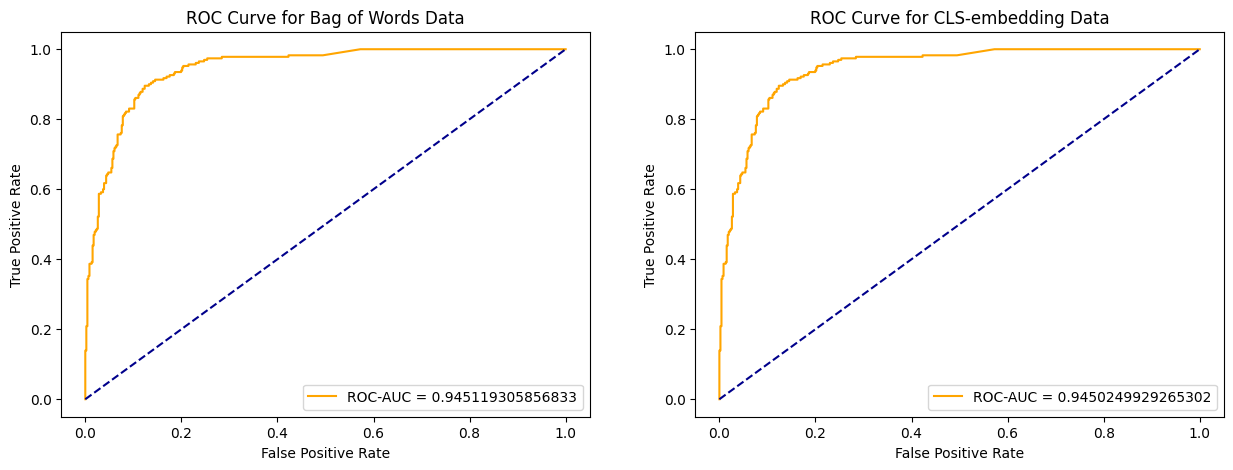

In [ ]:
# ROC-кривые
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fpr0, tpr0, thresholds0 = roc_curve(y_test, y_predict_01)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_predict_embed_bert_cls)
ax[0].plot(fpr0, tpr0, color='orange', label='ROC-AUC = ' + str(roc_auc_01))
ax[0].plot([0, 1], [0, 1], color='darkblue', linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve for Bag of Words Data')
ax[0].legend()
ax[1].plot(fpr0, tpr0, color='orange', label='ROC-AUC = ' + str(roc_auc_embed_bert_cls))
ax[1].plot([0, 1], [0, 1], color='darkblue', linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve for CLS-embedding Data')
ax[1].legend()
plt.show()

In [ ]:
# Оптимальный порог
import numpy as np
optimal_idx0 = np.argmax(tpr0 - fpr0)
optimal_idx1 = np.argmax(tpr1 - fpr1)
optimal_threshold0 = thresholds0[optimal_idx0]
optimal_threshold1 = thresholds1[optimal_idx1]
print('Оптимальный порог для Bag of Words Data: ', optimal_threshold0)
print('Оптимальный порог для CLS-embedding Data:', optimal_threshold1)

Оптимальный порог для Bag of Words Data:  0.44537932
Оптимальный порог для CLS-embedding Data: 0.49006963


In [ ]:
# Отчёты классификации
from sklearn.metrics import classification_report
print('Classification Report for Bag of Words Data')
print(classification_report(y_test, (y_predict_01 > optimal_threshold0).astype(int)))
print()
print('Classification Report for CLS-embedding Data')
print(classification_report(y_test, (y_predict_embed_bert_cls > optimal_threshold1).astype(int)))

Classification Report for Bag of Words Data
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       461
           1       0.78      0.89      0.83       230

    accuracy                           0.88       691
   macro avg       0.86      0.88      0.87       691
weighted avg       0.89      0.88      0.88       691


Classification Report for CLS-embedding Data
              precision    recall  f1-score   support

           0       0.95      0.86      0.91       461
           1       0.77      0.92      0.84       230

    accuracy                           0.88       691
   macro avg       0.86      0.89      0.87       691
weighted avg       0.89      0.88      0.88       691



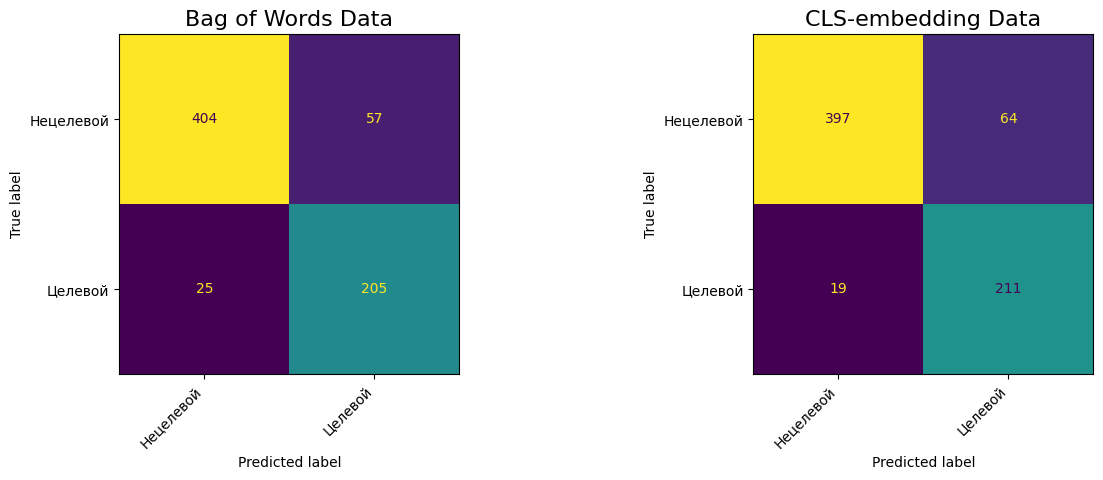

In [ ]:
# Матрицы ошибок
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm0 = confusion_matrix(y_test, (y_predict_01 > optimal_threshold0).astype(int))
cm1 = confusion_matrix(y_test, (y_predict_embed_bert_cls > optimal_threshold1).astype(int))
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Bag of Words Data', fontsize=16)
disp = ConfusionMatrixDisplay(confusion_matrix=cm0, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax[0])
ax[0].images[-1].colorbar.remove()
ax[0].grid(False)
ax[1].set_title('CLS-embedding Data', fontsize=16)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax[1])
ax[1].images[-1].colorbar.remove()
ax[1].grid(False)
fig.autofmt_xdate(rotation=45)
plt.show()

### Проверка работы моделей (архитектура прошлой недели) на тестовой выборке (метрика `AUC`)

In [3]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [4]:
# Загружаем модели
from tensorflow.keras.saving import load_model
model_path = my_drv_path + 'media108.ru/Новички/Модели/'
model_BoW_auc = load_model(model_path + 'model_BoW_auc2.keras')
model_embed_bert_cls_auc = load_model(model_path + 'model_embed_bert_cls_auc2.keras')

In [5]:
# Загрузка данных
import pickle as pkl
preprocessed_data_path = my_drv_path + 'media108.ru/Предобработанные данные/'
with open(preprocessed_data_path + 'x_textdata_01_test.pkl', 'rb') as f:
  x_textdata_01_test = pkl.load(f)
with open(preprocessed_data_path + 'x_textdata_embed_bert_cls_test.pkl', 'rb') as f:
  x_textdata_embed_bert_cls_test = pkl.load(f)
with open(preprocessed_data_path + 'y_test.pkl', 'rb') as f:
  y_test = pkl.load(f)

In [6]:
# Оценка по метрике ROC-AUC
from sklearn.metrics import roc_auc_score
y_predict_01 = model_BoW_auc.predict(x_textdata_01_test)
roc_auc_01 = roc_auc_score(y_test, y_predict_01)
y_predict_embed_bert_cls = model_embed_bert_cls_auc.predict(x_textdata_embed_bert_cls_test)
roc_auc_embed_bert_cls = roc_auc_score(y_test, y_predict_embed_bert_cls)
print('Точность на тестовой выборке по метрике ROC-AUC')
print(f'           model_BoW_auc: {roc_auc_01:5.3f}')
print(f'model_embed_bert_cls_auc: {roc_auc_embed_bert_cls:5.3f}')

22/22 [==============================] - 0s 3ms/step
Точность на тестовой выборке по метрике ROC-AUC
           model_BoW_auc: 0.947
model_embed_bert_cls_auc: 0.945


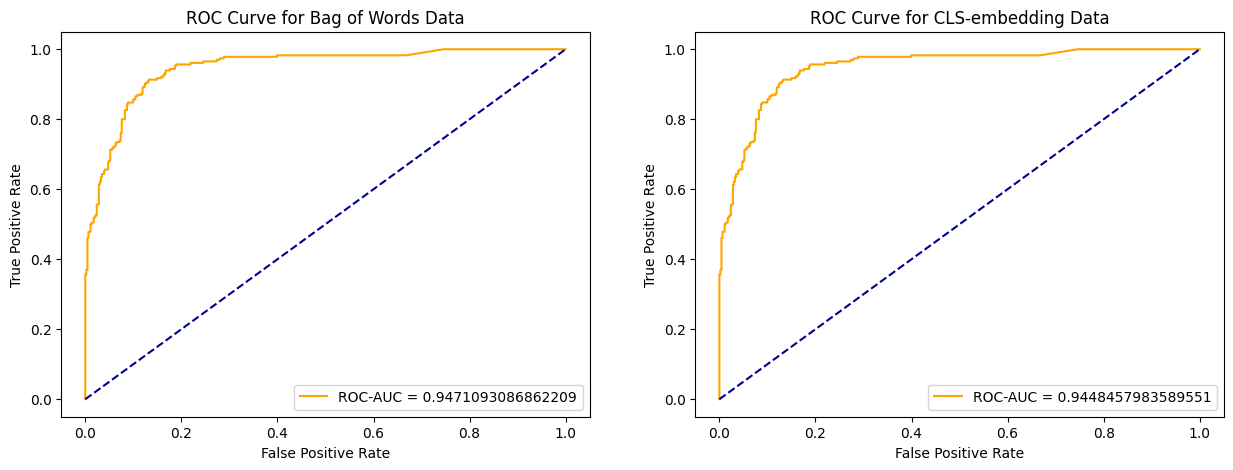

In [7]:
# ROC-кривые
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fpr0, tpr0, thresholds0 = roc_curve(y_test, y_predict_01)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_predict_embed_bert_cls)
ax[0].plot(fpr0, tpr0, color='orange', label='ROC-AUC = ' + str(roc_auc_01))
ax[0].plot([0, 1], [0, 1], color='darkblue', linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve for Bag of Words Data')
ax[0].legend()
ax[1].plot(fpr0, tpr0, color='orange', label='ROC-AUC = ' + str(roc_auc_embed_bert_cls))
ax[1].plot([0, 1], [0, 1], color='darkblue', linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve for CLS-embedding Data')
ax[1].legend()
plt.show()

In [8]:
# Оптимальный порог
import numpy as np
optimal_idx0 = np.argmax(tpr0 - fpr0)
optimal_idx1 = np.argmax(tpr1 - fpr1)
optimal_threshold0 = thresholds0[optimal_idx0]
optimal_threshold1 = thresholds1[optimal_idx1]
print('Оптимальный порог для Bag of Words Data: ', optimal_threshold0)
print('Оптимальный порог для CLS-embedding Data:', optimal_threshold1)

Оптимальный порог для Bag of Words Data:  0.7553162
Оптимальный порог для CLS-embedding Data: 0.5280596


In [9]:
# Отчёты классификации
from sklearn.metrics import classification_report
print('Classification Report for Bag of Words Data')
print(classification_report(y_test, (y_predict_01 > optimal_threshold0).astype(int)))
print()
print('Classification Report for CLS-embedding Data')
print(classification_report(y_test, (y_predict_embed_bert_cls > optimal_threshold1).astype(int)))

Classification Report for Bag of Words Data
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       461
           1       0.77      0.91      0.84       230

    accuracy                           0.88       691
   macro avg       0.86      0.89      0.87       691
weighted avg       0.89      0.88      0.88       691


Classification Report for CLS-embedding Data
              precision    recall  f1-score   support

           0       0.95      0.86      0.91       461
           1       0.77      0.92      0.84       230

    accuracy                           0.88       691
   macro avg       0.86      0.89      0.87       691
weighted avg       0.89      0.88      0.88       691



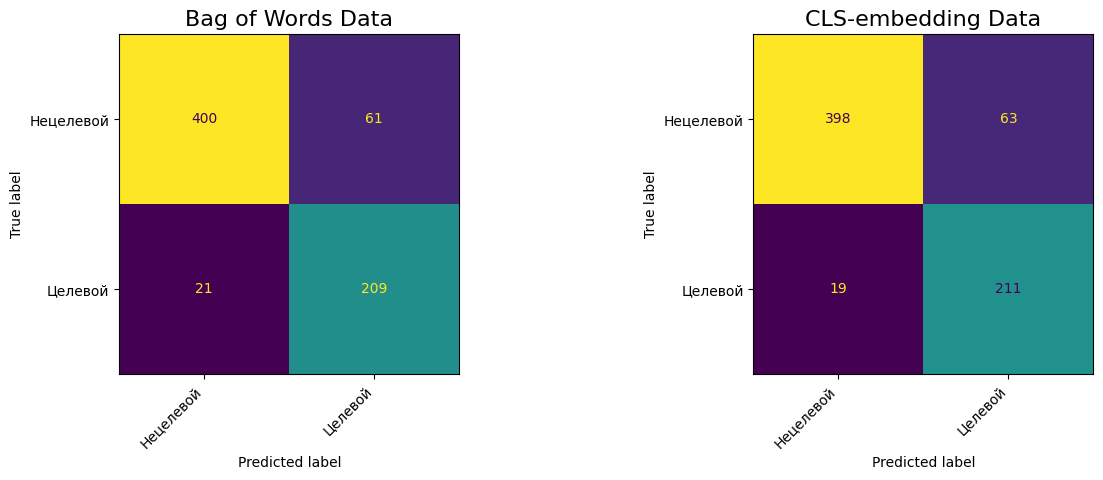

In [10]:
# Матрицы ошибок
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm0 = confusion_matrix(y_test, (y_predict_01 > optimal_threshold0).astype(int))
cm1 = confusion_matrix(y_test, (y_predict_embed_bert_cls > optimal_threshold1).astype(int))
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Bag of Words Data', fontsize=16)
disp = ConfusionMatrixDisplay(confusion_matrix=cm0, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax[0])
ax[0].images[-1].colorbar.remove()
ax[0].grid(False)
ax[1].set_title('CLS-embedding Data', fontsize=16)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax[1])
ax[1].images[-1].colorbar.remove()
ax[1].grid(False)
fig.autofmt_xdate(rotation=45)
plt.show()

### Проверка работы моделей на тестовой выборке (метрика `accuracy`)

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
# Загружаем модели
from tensorflow.keras.saving import load_model
model_path = my_drv_path + 'media108.ru/Новички/Модели/'
model_BoW_acc = load_model(model_path + 'model_BoW_acc.keras')
model_embed_bert_cls_acc = load_model(model_path + 'model_embed_bert_cls_acc.keras')

In [ ]:
# Загрузка данных
import pickle as pkl
preprocessed_data_path = my_drv_path + 'media108.ru/Предобработанные данные/'
with open(preprocessed_data_path + 'x_textdata_01_test.pkl', 'rb') as f:
  x_textdata_01_test = pkl.load(f)
with open(preprocessed_data_path + 'x_textdata_embed_bert_cls_test.pkl', 'rb') as f:
  x_textdata_embed_bert_cls_test = pkl.load(f)
with open(preprocessed_data_path + 'y_test.pkl', 'rb') as f:
  y_test = pkl.load(f)

In [ ]:
# Оценка по метрике accuracy
import numpy as np
from sklearn.metrics import accuracy_score
y_predict_01 = model_BoW_acc.predict(x_textdata_01_test)
accuracy_01 = accuracy_score(y_test, np.rint(y_predict_01))
y_predict_embed_bert_cls = model_embed_bert_cls_acc.predict(x_textdata_embed_bert_cls_test)
accuracy_embed_bert_cls = accuracy_score(y_test, np.rint(y_predict_embed_bert_cls))
print('Точность на тестовой выборке по метрике accuracy')
print(f'           model_BoW_acc: {accuracy_01:5.3f}')
print(f'model_embed_bert_cls_acc: {accuracy_embed_bert_cls:5.3f}')

22/22 [==============================] - 1s 7ms/step
Точность на тестовой выборке по метрике accuracy
           model_BoW_acc: 0.887
model_embed_bert_cls_acc: 0.870


In [ ]:
# Отчёты классификации
from sklearn.metrics import classification_report
print('Classification Report for Bag of Words Data')
print(classification_report(y_test, np.rint(y_predict_01)))
print()
print('Classification Report for CLS-embedding Data')
print(classification_report(y_test, np.rint(y_predict_embed_bert_cls)))

Classification Report for Bag of Words Data
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       461
           1       0.81      0.87      0.84       230

    accuracy                           0.89       691
   macro avg       0.87      0.88      0.88       691
weighted avg       0.89      0.89      0.89       691


Classification Report for CLS-embedding Data
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       461
           1       0.76      0.89      0.82       230

    accuracy                           0.87       691
   macro avg       0.85      0.87      0.86       691
weighted avg       0.88      0.87      0.87       691



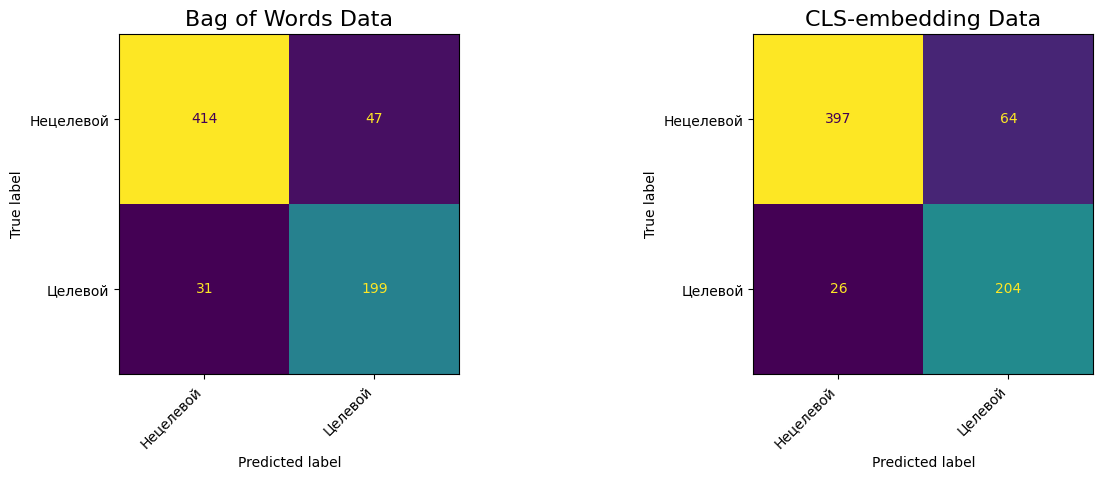

In [ ]:
# Матрицы ошибок
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm0 = confusion_matrix(y_test, np.rint(y_predict_01))
cm1 = confusion_matrix(y_test, np.rint(y_predict_embed_bert_cls))
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Bag of Words Data', fontsize=16)
disp = ConfusionMatrixDisplay(confusion_matrix=cm0, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax[0])
ax[0].images[-1].colorbar.remove()
ax[0].grid(False)
ax[1].set_title('CLS-embedding Data', fontsize=16)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax[1])
ax[1].images[-1].colorbar.remove()
ax[1].grid(False)
fig.autofmt_xdate(rotation=45)
plt.show()

### Проверка работы моделей (архитектура прошлой недели) на тестовой выборке (метрика `accuracy`)

In [3]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [4]:
# Загружаем модели
from tensorflow.keras.saving import load_model
model_path = my_drv_path + 'media108.ru/Новички/Модели/'
model_BoW_acc = load_model(model_path + 'model_BoW_acc2.keras')
model_embed_bert_cls_acc = load_model(model_path + 'model_embed_bert_cls_acc2.keras')

In [5]:
# Загрузка данных
import pickle as pkl
preprocessed_data_path = my_drv_path + 'media108.ru/Предобработанные данные/'
with open(preprocessed_data_path + 'x_textdata_01_test.pkl', 'rb') as f:
  x_textdata_01_test = pkl.load(f)
with open(preprocessed_data_path + 'x_textdata_embed_bert_cls_test.pkl', 'rb') as f:
  x_textdata_embed_bert_cls_test = pkl.load(f)
with open(preprocessed_data_path + 'y_test.pkl', 'rb') as f:
  y_test = pkl.load(f)

In [6]:
# Оценка по метрике accuracy
import numpy as np
from sklearn.metrics import accuracy_score
y_predict_01 = model_BoW_acc.predict(x_textdata_01_test)
accuracy_01 = accuracy_score(y_test, np.rint(y_predict_01))
y_predict_embed_bert_cls = model_embed_bert_cls_acc.predict(x_textdata_embed_bert_cls_test)
accuracy_embed_bert_cls = accuracy_score(y_test, np.rint(y_predict_embed_bert_cls))
print('Точность на тестовой выборке по метрике accuracy')
print(f'           model_BoW_acc: {accuracy_01:5.3f}')
print(f'model_embed_bert_cls_acc: {accuracy_embed_bert_cls:5.3f}')

22/22 [==============================] - 0s 3ms/step
Точность на тестовой выборке по метрике accuracy
           model_BoW_acc: 0.890
model_embed_bert_cls_acc: 0.873


In [7]:
# Отчёты классификации
from sklearn.metrics import classification_report
print('Classification Report for Bag of Words Data')
print(classification_report(y_test, np.rint(y_predict_01)))
print()
print('Classification Report for CLS-embedding Data')
print(classification_report(y_test, np.rint(y_predict_embed_bert_cls)))

Classification Report for Bag of Words Data
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       461
           1       0.83      0.84      0.84       230

    accuracy                           0.89       691
   macro avg       0.88      0.88      0.88       691
weighted avg       0.89      0.89      0.89       691


Classification Report for CLS-embedding Data
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       461
           1       0.77      0.87      0.82       230

    accuracy                           0.87       691
   macro avg       0.85      0.87      0.86       691
weighted avg       0.88      0.87      0.87       691



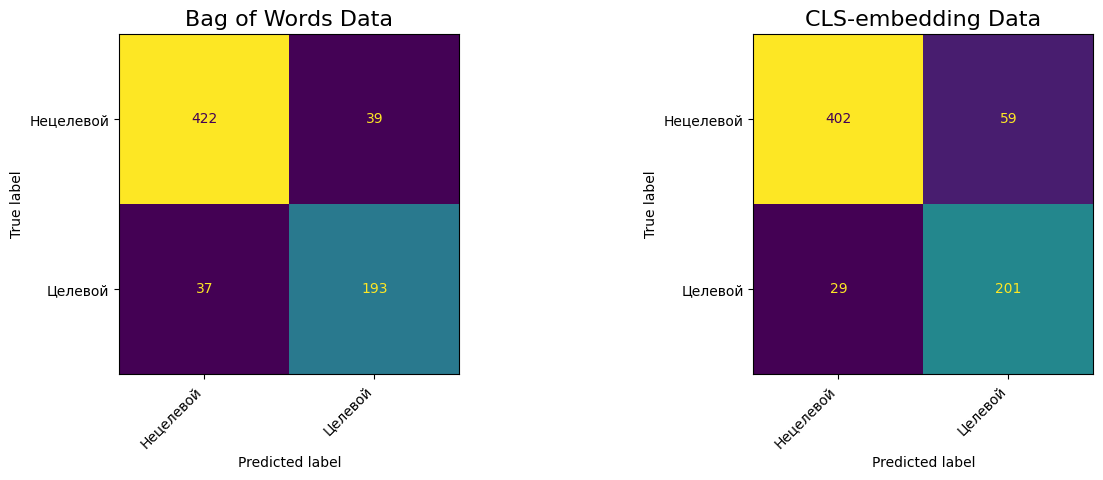

In [8]:
# Матрицы ошибок
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm0 = confusion_matrix(y_test, np.rint(y_predict_01))
cm1 = confusion_matrix(y_test, np.rint(y_predict_embed_bert_cls))
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Bag of Words Data', fontsize=16)
disp = ConfusionMatrixDisplay(confusion_matrix=cm0, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax[0])
ax[0].images[-1].colorbar.remove()
ax[0].grid(False)
ax[1].set_title('CLS-embedding Data', fontsize=16)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Нецелевой', 'Целевой'])
disp.plot(ax=ax[1])
ax[1].images[-1].colorbar.remove()
ax[1].grid(False)
fig.autofmt_xdate(rotation=45)
plt.show()

### Матрицы ошибок

**Метрика `AUC`**

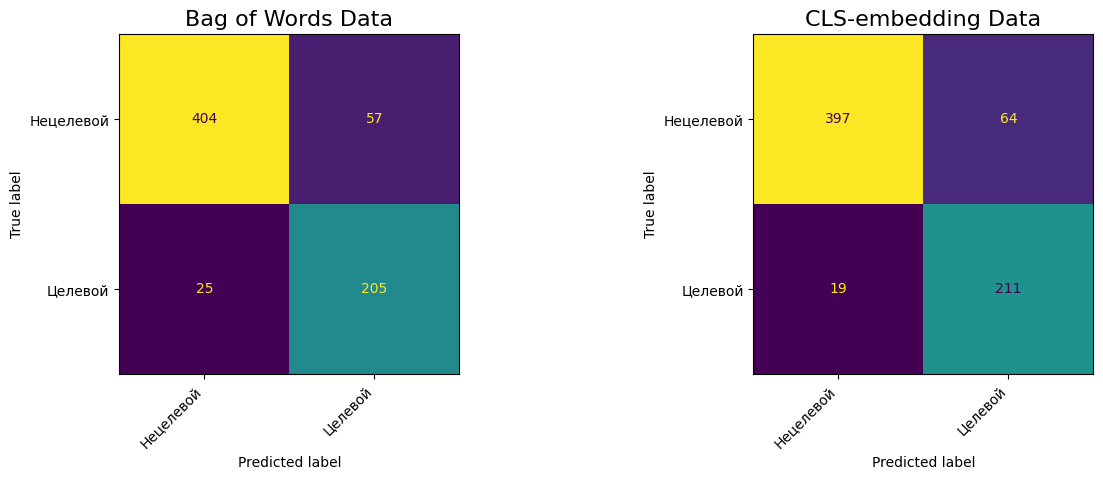

**Метрика `accuracy`**

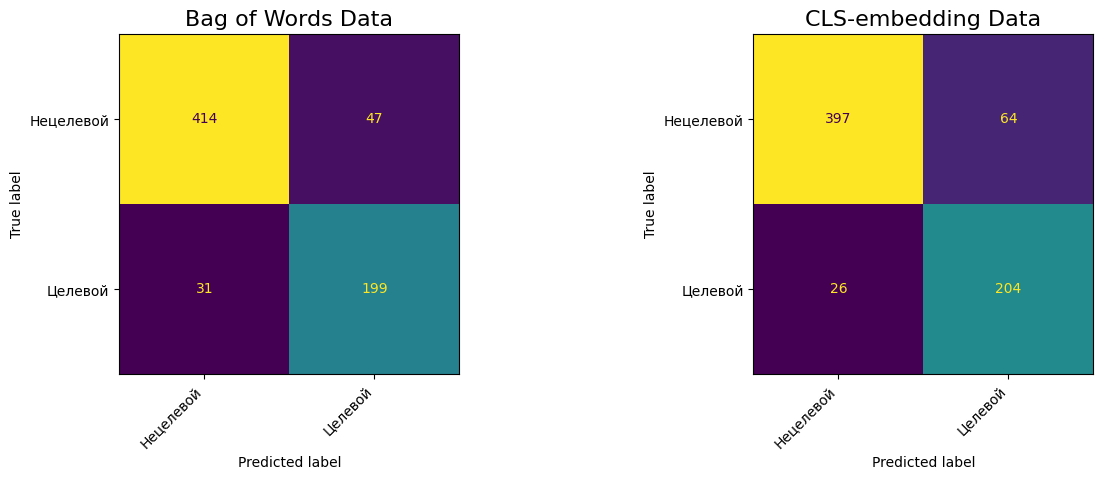

**Метрика `AUC` (архитектура прошлой недели)**

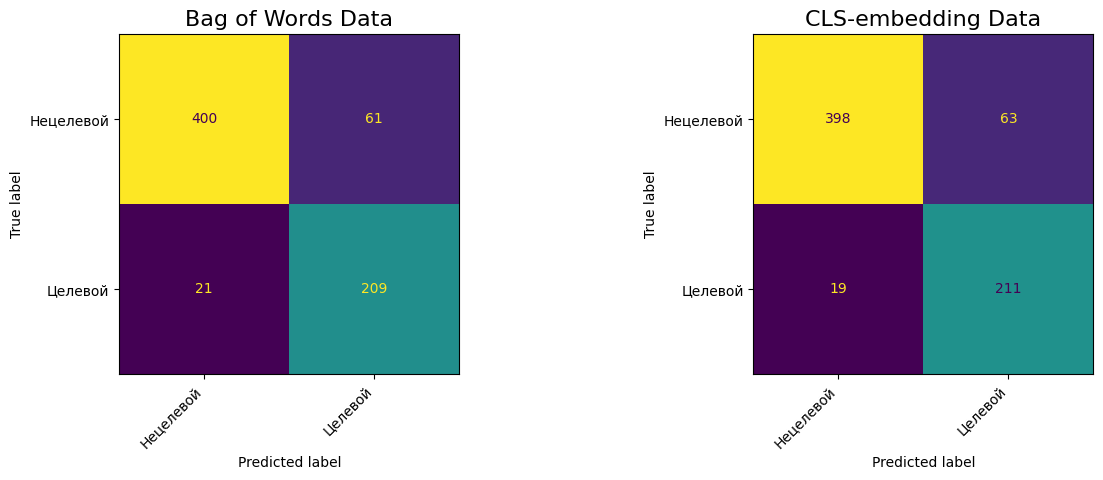

**Метрика `accuracy` (архитектура прошлой недели)**

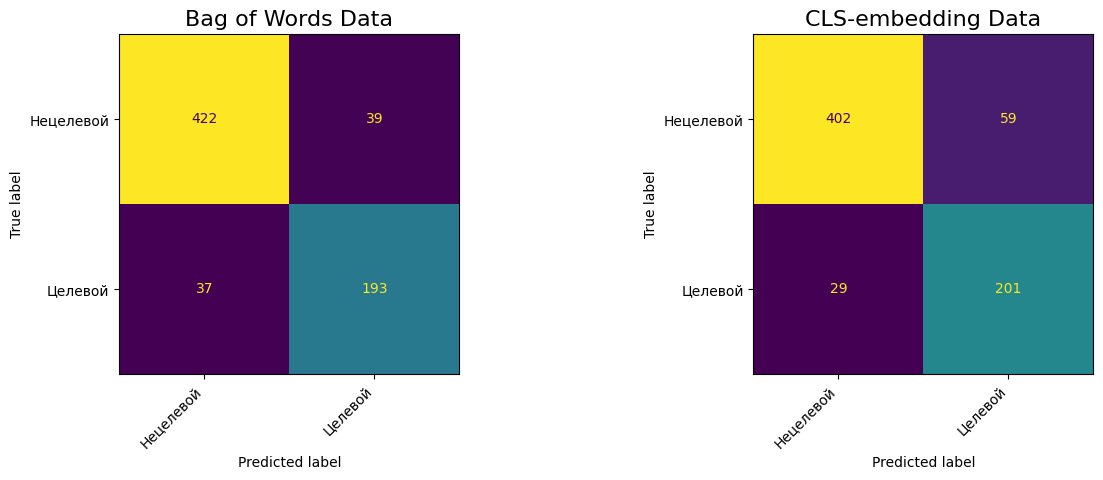